In [1]:
# importing libraries
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import zscore,boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv('file1.csv')
df1.head()

Unnamed: 0 S.No                                         Movie Name  \
0           0   1.                                    The Dark Knight   
1           1   2.      The Lord of the Rings: The Return of the King   
2           2   3.                                          Inception   
3           3   4.  The Lord of the Rings: The Fellowship of the Ring   
4           4   5.              The Lord of the Rings: The Two Towers   

     Director Name_1 Director Name_2 Duration  Year  Ratings     Metascore  
0  Christopher Nolan               -  152 min  2008      9.0  84 Metascore  
1      Peter Jackson               -  201 min  2003      9.0  94 Metascore  
2  Christopher Nolan               -  148 min  2010      8.8  74 Metascore  
3      Peter Jackson               -  178 min  2001      8.8  92 Metascore  
4      Peter Jackson               -  179 min  2002      8.8  87 Metascore

In [3]:
df2=pd.read_csv('file2.csv')
df2.head()

Unnamed: 0                                         Movie Name  \
0           0                                    The Dark Knight   
1           1      The Lord of the Rings: The Return of the King   
2           2                                          Inception   
3           3  The Lord of the Rings: The Fellowship of the Ring   
4           4              The Lord of the Rings: The Two Towers   

               Star1                 Star2            Star3          Star4  \
0     Christian Bale          Heath Ledger    Aaron Eckhart  Michael Caine   
1        Elijah Wood       Viggo Mortensen     Ian McKellen  Orlando Bloom   
2  Leonardo DiCaprio  Joseph Gordon-Levitt      Elliot Page   Ken Watanabe   
3        Elijah Wood          Ian McKellen    Orlando Bloom      Sean Bean   
4        Elijah Wood          Ian McKellen  Viggo Mortensen  Orlando Bloom   

         Votes  Genre1     Genre2  Genre3 Gross Collection Certification  
0   2,718,552   Action      Crime   Drama         $534.86M         PG-13  
1   1,887,293   Action  Adventure   Drama         $377.85M         PG-13  
2   2,413,311   Action  Adventure  Sci-Fi         $292.58M         PG-13  
3   1,915,945   Action  Adventure   Drama         $315.54M         PG-13  
4   1,703,466   Action  Adventure   Drama         $342.55M         PG-13

In [4]:
df1.shape

(1700, 9)

In [5]:
df2.shape

(1700, 12)

In [6]:
df=pd.merge(df1,df2,how='outer',on='Movie Name',suffixes=('_left','_right'))
df

Unnamed: 0_left    S.No  \
0                   0      1.   
1                   1      2.   
2                   2      3.   
3                   3      4.   
4                   4      5.   
...               ...     ...   
1777             1695  1,696.   
1778             1696  1,697.   
1779             1697  1,698.   
1780             1698  1,699.   
1781             1699  1,700.   

                                             Movie Name    Director Name_1  \
0                                       The Dark Knight  Christopher Nolan   
1         The Lord of the Rings: The Return of the King      Peter Jackson   
2                                             Inception  Christopher Nolan   
3     The Lord of the Rings: The Fellowship of the Ring      Peter Jackson   
4                 The Lord of the Rings: The Two Towers      Peter Jackson   
...                                                 ...                ...   
1777                                         Species II        Peter Medak   
1778                            xXx: State of the Union       Lee Tamahori   
1779                                      Kangaroo Jack      David McNally   
1780                                            Skyline      Colin Strause   
1781                                The Next Karate Kid   Christopher Cain   

     Director Name_2 Duration  Year  Ratings     Metascore  Unnamed: 0_right  \
0                  -  152 min  2008      9.0  84 Metascore                 0   
1                  -  201 min  2003      9.0  94 Metascore                 1   
2                  -  148 min  2010      8.8  74 Metascore                 2   
3                  -  178 min  2001      8.8  92 Metascore                 3   
4                  -  179 min  2002      8.8  87 Metascore                 4   
...              ...      ...   ...      ...           ...               ...   
1777               -   93 min  1998      4.5  19 Metascore              1695   
1778               -  101 min  2005      4.5  37 Metascore              1696   
1779               -   89 min  2003      4.5  16 Metascore              1697   
1780    Greg Strause   92 min  2010      4.5  26 Metascore              1698   
1781               -  107 min  1994      4.5  36 Metascore              1699   

                   Star1                 Star2              Star3  \
0         Christian Bale          Heath Ledger      Aaron Eckhart   
1            Elijah Wood       Viggo Mortensen       Ian McKellen   
2      Leonardo DiCaprio  Joseph Gordon-Levitt        Elliot Page   
3            Elijah Wood          Ian McKellen      Orlando Bloom   
4            Elijah Wood          Ian McKellen    Viggo Mortensen   
...                  ...                   ...                ...   
1777  Natasha Henstridge        Michael Madsen  Marg Helgenberger   
1778            Ice Cube     Samuel L. Jackson       Willem Dafoe   
1779    Anthony Anderson       Jerry O'Connell     Estella Warren   
1780        Eric Balfour         Donald Faison   Scottie Thompson   
1781          Pat Morita          Hilary Swank   Michael Ironside   

                   Star4        Votes  Genre1     Genre2    Genre3  \
0          Michael Caine   2,718,552   Action      Crime     Drama   
1          Orlando Bloom   1,887,293   Action  Adventure     Drama   
2           Ken Watanabe   2,413,311   Action  Adventure    Sci-Fi   
3              Sean Bean   1,915,945   Action  Adventure     Drama   
4          Orlando Bloom   1,703,466   Action  Adventure     Drama   
...                  ...          ...     ...        ...       ...   
1777  Mykelti Williamson      30,226   Action     Horror    Sci-Fi   
1778      Scott Speedman      72,108   Action  Adventure     Crime   
1779  Christopher Walken      32,727   Action  Adventure    Comedy   
1780     Brittany Daniel      90,900   Action     Sci-Fi  Thriller   
1781    Constance Towers      32,402   Action      Drama    Family   

     Gross Collection Certification  
0  

# Exploratory Data Analysis(EDA)

In [7]:
print('Shape is',df.shape)
print('Total Rows are',df.shape[0])
print('Total Columns are',df.shape[1])

Shape is (1782, 20)
Total Rows are 1782
Total Columns are 20


In [8]:
# checking the column names
df.columns

Index(['Unnamed: 0_left', 'S.No', 'Movie Name', 'Director Name_1',
       'Director Name_2', 'Duration', 'Year', 'Ratings', 'Metascore',
       'Unnamed: 0_right', 'Star1', 'Star2', 'Star3', 'Star4', 'Votes',
       'Genre1', 'Genre2', 'Genre3', 'Gross Collection', 'Certification'],
      dtype='object')

In [9]:
# dropping unwanted columns
df.drop(columns=['Unnamed: 0_left','Unnamed: 0_right'],inplace=True)

In [10]:
# chekcing the dataset again
df.head()

S.No                                         Movie Name    Director Name_1  \
0   1.                                    The Dark Knight  Christopher Nolan   
1   2.      The Lord of the Rings: The Return of the King      Peter Jackson   
2   3.                                          Inception  Christopher Nolan   
3   4.  The Lord of the Rings: The Fellowship of the Ring      Peter Jackson   
4   5.              The Lord of the Rings: The Two Towers      Peter Jackson   

  Director Name_2 Duration  Year  Ratings     Metascore              Star1  \
0               -  152 min  2008      9.0  84 Metascore     Christian Bale   
1               -  201 min  2003      9.0  94 Metascore        Elijah Wood   
2               -  148 min  2010      8.8  74 Metascore  Leonardo DiCaprio   
3               -  178 min  2001      8.8  92 Metascore        Elijah Wood   
4               -  179 min  2002      8.8  87 Metascore        Elijah Wood   

                  Star2            Star3          Star4        Votes  Genre1  \
0          Heath Ledger    Aaron Eckhart  Michael Caine   2,718,552   Action   
1       Viggo Mortensen     Ian McKellen  Orlando Bloom   1,887,293   Action   
2  Joseph Gordon-Levitt      Elliot Page   Ken Watanabe   2,413,311   Action   
3          Ian McKellen    Orlando Bloom      Sean Bean   1,915,945   Action   
4          Ian McKellen  Viggo Mortensen  Orlando Bloom   1,703,466   Action   

      Genre2  Genre3 Gross Collection Certification  
0      Crime   Drama         $534.86M         PG-13  
1  Adventure   Drama         $377.85M         PG-13  
2  Adventure  Sci-Fi         $292.58M         PG-13  
3  Adventure   Drama         $315.54M         PG-13  
4  Adventure   Drama         $342.55M         PG-13

In [11]:
# checking for missing values
df.isnull().sum()

S.No                  0
Movie Name            0
Director Name_1       0
Director Name_2       0
Duration              0
Year                  0
Ratings               0
Metascore           177
Star1                 0
Star2                 0
Star3                 0
Star4                 0
Votes                 0
Genre1                0
Genre2                0
Genre3                0
Gross Collection      0
Certification         0
dtype: int64

In [12]:
# filling missing values
df=df.dropna()

In [13]:
# Getting the general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1605 entries, 0 to 1781
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S.No              1605 non-null   object 
 1   Movie Name        1605 non-null   object 
 2   Director Name_1   1605 non-null   object 
 3   Director Name_2   1605 non-null   object 
 4   Duration          1605 non-null   object 
 5   Year              1605 non-null   object 
 6   Ratings           1605 non-null   float64
 7   Metascore         1605 non-null   object 
 8   Star1             1605 non-null   object 
 9   Star2             1605 non-null   object 
 10  Star3             1605 non-null   object 
 11  Star4             1605 non-null   object 
 12  Votes             1605 non-null   object 
 13  Genre1            1605 non-null   object 
 14  Genre2            1605 non-null   object 
 15  Genre3            1605 non-null   object 
 16  Gross Collection  1605 non-null   object 


In [14]:
# Checking for numerical and categorical features.

nf = df.select_dtypes(include=[np.number]).columns
cf = df.select_dtypes(include=[np.object]).columns

print('Numerical features in the dataset are:\n',nf,'\n','-'*70,'\n Categorical features in the dataset are:\n',cf)

Numerical features in the dataset are:
 Index(['Ratings'], dtype='object') 
 ---------------------------------------------------------------------- 
 Categorical features in the dataset are:
 Index(['S.No', 'Movie Name', 'Director Name_1', 'Director Name_2', 'Duration',
       'Year', 'Metascore', 'Star1', 'Star2', 'Star3', 'Star4', 'Votes',
       'Genre1', 'Genre2', 'Genre3', 'Gross Collection', 'Certification'],
      dtype='object')


In [15]:
df.dtypes

S.No                 object
Movie Name           object
Director Name_1      object
Director Name_2      object
Duration             object
Year                 object
Ratings             float64
Metascore            object
Star1                object
Star2                object
Star3                object
Star4                object
Votes                object
Genre1               object
Genre2               object
Genre3               object
Gross Collection     object
Certification        object
dtype: object

# Data Visualization

In [16]:
df.head()

S.No                                         Movie Name    Director Name_1  \
0   1.                                    The Dark Knight  Christopher Nolan   
1   2.      The Lord of the Rings: The Return of the King      Peter Jackson   
2   3.                                          Inception  Christopher Nolan   
3   4.  The Lord of the Rings: The Fellowship of the Ring      Peter Jackson   
4   5.              The Lord of the Rings: The Two Towers      Peter Jackson   

  Director Name_2 Duration  Year  Ratings     Metascore              Star1  \
0               -  152 min  2008      9.0  84 Metascore     Christian Bale   
1               -  201 min  2003      9.0  94 Metascore        Elijah Wood   
2               -  148 min  2010      8.8  74 Metascore  Leonardo DiCaprio   
3               -  178 min  2001      8.8  92 Metascore        Elijah Wood   
4               -  179 min  2002      8.8  87 Metascore        Elijah Wood   

                  Star2            Star3          Star4        Votes  Genre1  \
0          Heath Ledger    Aaron Eckhart  Michael Caine   2,718,552   Action   
1       Viggo Mortensen     Ian McKellen  Orlando Bloom   1,887,293   Action   
2  Joseph Gordon-Levitt      Elliot Page   Ken Watanabe   2,413,311   Action   
3          Ian McKellen    Orlando Bloom      Sean Bean   1,915,945   Action   
4          Ian McKellen  Viggo Mortensen  Orlando Bloom   1,703,466   Action   

      Genre2  Genre3 Gross Collection Certification  
0      Crime   Drama         $534.86M         PG-13  
1  Adventure   Drama         $377.85M         PG-13  
2  Adventure  Sci-Fi         $292.58M         PG-13  
3  Adventure   Drama         $315.54M         PG-13  
4  Adventure   Drama         $342.55M         PG-13

In [17]:
df.drop(columns=['S.No'],inplace=True)

In [18]:
df.head()

Movie Name    Director Name_1  \
0                                    The Dark Knight  Christopher Nolan   
1      The Lord of the Rings: The Return of the King      Peter Jackson   
2                                          Inception  Christopher Nolan   
3  The Lord of the Rings: The Fellowship of the Ring      Peter Jackson   
4              The Lord of the Rings: The Two Towers      Peter Jackson   

  Director Name_2 Duration  Year  Ratings     Metascore              Star1  \
0               -  152 min  2008      9.0  84 Metascore     Christian Bale   
1               -  201 min  2003      9.0  94 Metascore        Elijah Wood   
2               -  148 min  2010      8.8  74 Metascore  Leonardo DiCaprio   
3               -  178 min  2001      8.8  92 Metascore        Elijah Wood   
4               -  179 min  2002      8.8  87 Metascore        Elijah Wood   

                  Star2            Star3          Star4        Votes  Genre1  \
0          Heath Ledger    Aaron Eckhart  Michael Caine   2,718,552   Action   
1       Viggo Mortensen     Ian McKellen  Orlando Bloom   1,887,293   Action   
2  Joseph Gordon-Levitt      Elliot Page   Ken Watanabe   2,413,311   Action   
3          Ian McKellen    Orlando Bloom      Sean Bean   1,915,945   Action   
4          Ian McKellen  Viggo Mortensen  Orlando Bloom   1,703,466   Action   

      Genre2  Genre3 Gross Collection Certification  
0      Crime   Drama         $534.86M         PG-13  
1  Adventure   Drama         $377.85M         PG-13  
2  Adventure  Sci-Fi         $292.58M         PG-13  
3  Adventure   Drama         $315.54M         PG-13  
4  Adventure   Drama         $342.55M         PG-13

The Value Counts for the attribute "Movie Name" is
 G                              9
Mr                             9
Get Carter                     4
Ghostbusters                   4
Guardians of the Galaxy Vol    4
                              ..
Westworld                      1
The Guardian                   1
The Last Castle                1
Non-Stop                       1
The Next Karate Kid            1
Name: Movie Name, Length: 1497, dtype: int64

The Countplot Diagram for the attribute "Movie Name" is
 AxesSubplot(0.125,0.125;0.775x0.755)


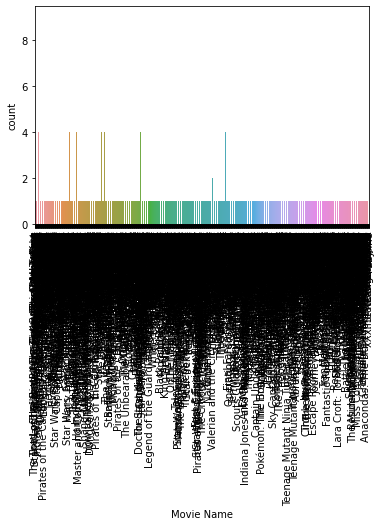



The Value Counts for the attribute "Director Name_1" is
 Michael Bay        15
Ridley Scott       13
Tony Scott         13
Roland Emmerich    13
Antoine Fuqua      13
                   ..
John Dahl           1
Tony Gilroy         1
Chris Wedge         1
Tom Harper          1
David McNally       1
Name: Director Name_1, Length: 786, dtype: int64

The Countplot Diagram for the attribute "Director Name_1" is
 AxesSubplot(0.125,0.125;0.775x0.755)


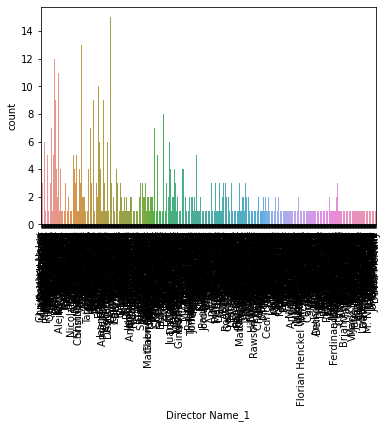



The Value Counts for the attribute "Director Name_2" is
 -                      1509
 Joe Russo                5
 Lilly Wachowski          5
 Christopher Miller       3
 Brian Taylor             3
                       ... 
 Alan Mak                 1
 Corey Yuen               1
 Richard Donner           1
 Shinji Higuchi           1
 Allen Hughes             1
Name: Director Name_2, Length: 77, dtype: int64

The Countplot Diagram for the attribute "Director Name_2" is
 AxesSubplot(0.125,0.125;0.775x0.755)


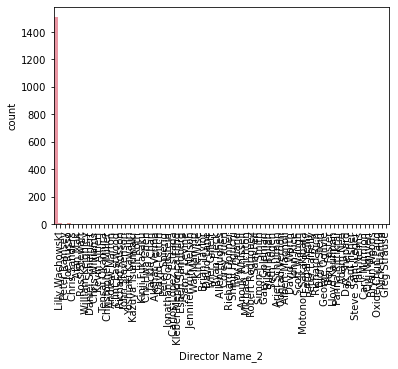



The Value Counts for the attribute "Duration" is
 107 min    46
110 min    44
109 min    43
102 min    40
118 min    39
           ..
242 min     1
201 min     1
176 min     1
153 min     1
75 min      1
Name: Duration, Length: 107, dtype: int64

The Countplot Diagram for the attribute "Duration" is
 AxesSubplot(0.125,0.125;0.775x0.755)


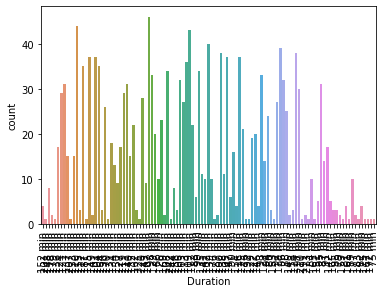



The Value Counts for the attribute "Year" is
 I       95
2016    63
2011    59
2014    57
2013    57
        ..
1958     1
1953     1
1965     1
1959     1
IV       1
Name: Year, Length: 74, dtype: int64

The Countplot Diagram for the attribute "Year" is
 AxesSubplot(0.125,0.125;0.775x0.755)


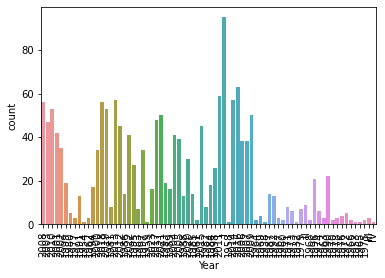



The Value Counts for the attribute "Ratings" is
 6.2    88
6.6    86
6.1    82
6.4    81
6.3    79
6.5    75
6.7    75
7.0    62
6.0    59
7.3    56
6.9    56
5.7    55
7.2    53
5.8    52
7.1    50
5.9    50
6.8    50
5.6    46
7.6    43
7.5    37
5.4    35
7.4    32
5.5    32
7.7    31
7.8    31
5.3    26
5.2    25
8.0    21
7.9    20
5.1    18
8.2    15
8.1    12
5.0    10
4.7     9
4.5     8
8.4     8
4.8     8
4.9     6
4.6     5
8.3     5
8.6     4
8.8     3
8.5     2
8.7     2
9.0     2
Name: Ratings, dtype: int64

The Countplot Diagram for the attribute "Ratings" is
 AxesSubplot(0.125,0.125;0.775x0.755)


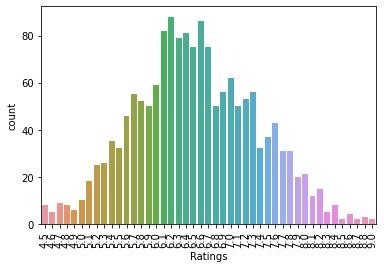



The Value Counts for the attribute "Metascore" is
 51 Metascore    44
52 Metascore    43
48 Metascore    43
60 Metascore    41
49 Metascore    41
                ..
93 Metascore     2
14 Metascore     1
13 Metascore     1
92 Metascore     1
88 Metascore     1
Name: Metascore, Length: 81, dtype: int64

The Countplot Diagram for the attribute "Metascore" is
 AxesSubplot(0.125,0.125;0.775x0.755)


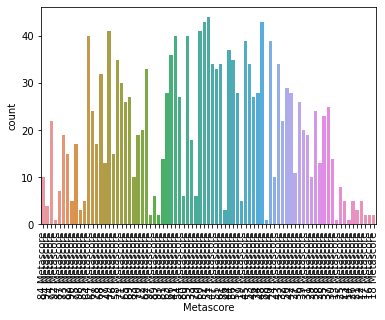



The Value Counts for the attribute "Star1" is
 Arnold Schwarzenegger    24
Dwayne Johnson           22
Bruce Willis             22
Sylvester Stallone       22
Tom Cruise               21
                         ..
Michael Beck              1
Jeremy Piven              1
Edward Norton             1
Tom Hiddleston            1
Eric Balfour              1
Name: Star1, Length: 615, dtype: int64

The Countplot Diagram for the attribute "Star1" is
 AxesSubplot(0.125,0.125;0.775x0.755)


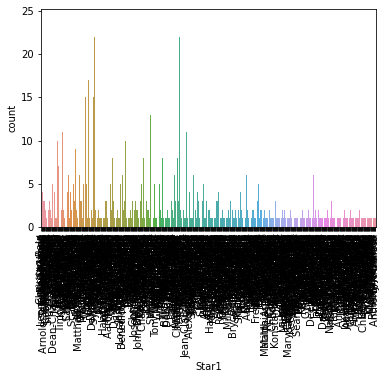



The Value Counts for the attribute "Star2" is
 Samuel L. Jackson     13
Laurence Fishburne     9
Channing Tatum         8
Mark Wahlberg          8
Liam Neeson            7
                      ..
Martin Short           1
Jarrett Bruno          1
Consuelo Gómez         1
Louis Gossett Jr.      1
Donald Faison          1
Name: Star2, Length: 1021, dtype: int64

The Countplot Diagram for the attribute "Star2" is
 AxesSubplot(0.125,0.125;0.775x0.755)


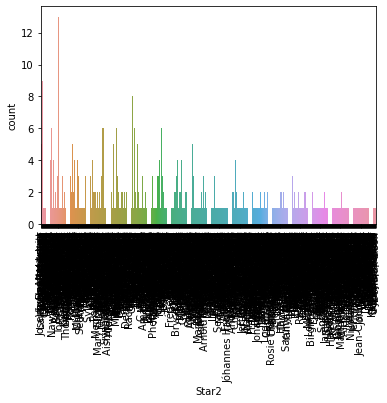



The Value Counts for the attribute "Star3" is
 Samuel L. Jackson    8
Morgan Freeman       7
Mark Ruffalo         6
Willem Dafoe         6
Ian McShane          6
                    ..
Aorere Paki          1
Tim Key              1
Archie Panjabi       1
Lashana Lynch        1
Scottie Thompson     1
Name: Star3, Length: 1158, dtype: int64

The Countplot Diagram for the attribute "Star3" is
 AxesSubplot(0.125,0.125;0.775x0.755)


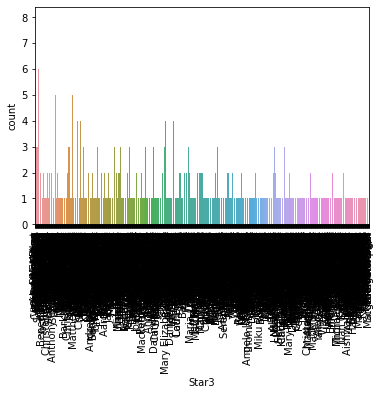



The Value Counts for the attribute "Star4" is
 Jeffrey Wright       5
Famke Janssen        5
Don Cheadle          5
Vincent D'Onofrio    5
Danny Huston         5
                    ..
David O'Hara         1
Chaka Forman         1
Igal Naor            1
Danny Hoch           1
Constance Towers     1
Name: Star4, Length: 1253, dtype: int64

The Countplot Diagram for the attribute "Star4" is
 AxesSubplot(0.125,0.125;0.775x0.755)


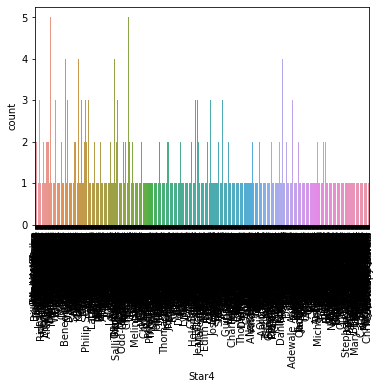



The Value Counts for the attribute "Votes" is
  512,142     3
 58,111      3
 84,166      3
 184,454     3
 211,920     3
            ..
 60,650      1
 95,379      1
 82,890      1
 269,630     1
 32,402      1
Name: Votes, Length: 1533, dtype: int64

The Countplot Diagram for the attribute "Votes" is
 AxesSubplot(0.125,0.125;0.775x0.755)


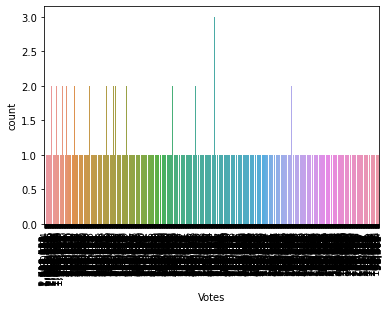



The Value Counts for the attribute "Genre1" is
 Action       1541
Animation      64
Name: Genre1, dtype: int64

The Countplot Diagram for the attribute "Genre1" is
 AxesSubplot(0.125,0.125;0.775x0.755)


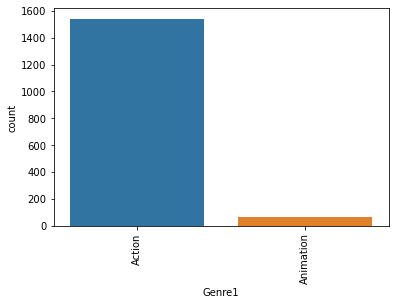



The Value Counts for the attribute "Genre2" is
 Adventure    623
Crime        305
Comedy       199
Drama        177
Action        64
Thriller      60
Sci-Fi        52
Horror        46
Biography     32
Mystery       21
Fantasy       19
War            2
-              2
Romance        1
Sport          1
Family         1
Name: Genre2, dtype: int64

The Countplot Diagram for the attribute "Genre2" is
 AxesSubplot(0.125,0.125;0.775x0.755)


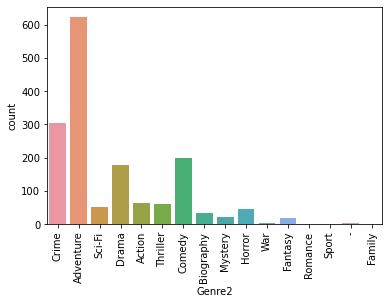



The Value Counts for the attribute "Genre3" is
 Drama        294
Thriller     286
Sci-Fi       222
Crime        148
Comedy       131
Fantasy      126
-            124
Adventure     57
Horror        51
Mystery       35
History       32
Family        23
War           22
Romance       21
Sport         14
Biography     10
Western        8
Music          1
Name: Genre3, dtype: int64

The Countplot Diagram for the attribute "Genre3" is
 AxesSubplot(0.125,0.125;0.775x0.755)


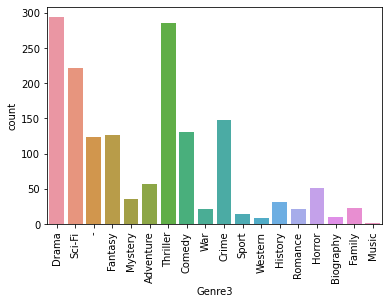



The Value Counts for the attribute "Gross Collection" is
 -          170
$0.03M      10
$0.10M       5
$0.05M       5
$0.02M       4
          ... 
$33.61M      1
$55.68M      1
$20.76M      1
$3.77M       1
$8.91M       1
Name: Gross Collection, Length: 1278, dtype: int64

The Countplot Diagram for the attribute "Gross Collection" is
 AxesSubplot(0.125,0.125;0.775x0.755)


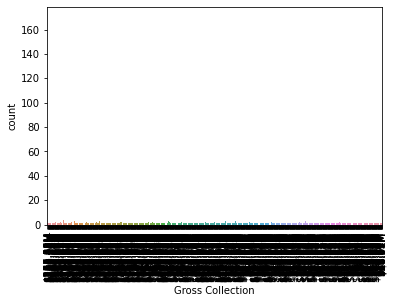



The Value Counts for the attribute "Certification" is
 R            687
PG-13        638
PG           182
Not Rated     43
TV-MA         28
G             13
Approved       5
TV-14          3
M              2
U              1
M/PG           1
UA             1
16+            1
Name: Certification, dtype: int64

The Countplot Diagram for the attribute "Certification" is
 AxesSubplot(0.125,0.125;0.775x0.755)


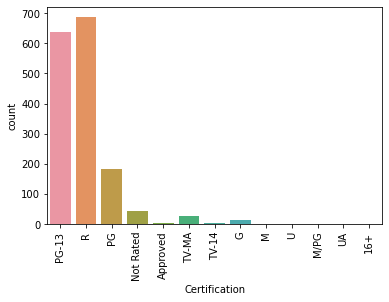

In [20]:
for i in df.columns:
    print(f'The Value Counts for the attribute "{i}" is\n {df[i].value_counts()}')
    print(f'\nThe Countplot Diagram for the attribute "{i}" is\n {sns.countplot(df[i])}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

The Histogram Diagram for the attribute "Movie Name" is
 AxesSubplot(0.125,0.125;0.775x0.755)


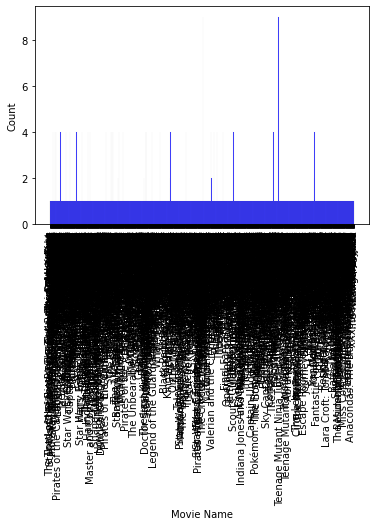



The Histogram Diagram for the attribute "Director Name_1" is
 AxesSubplot(0.125,0.125;0.775x0.755)


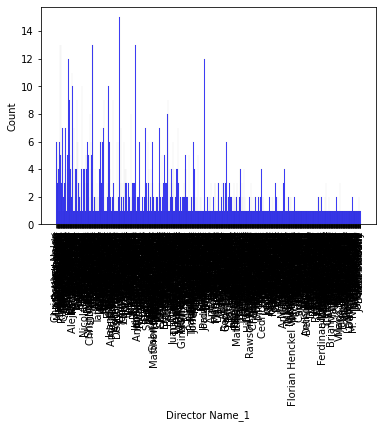



The Histogram Diagram for the attribute "Director Name_2" is
 AxesSubplot(0.125,0.125;0.775x0.755)


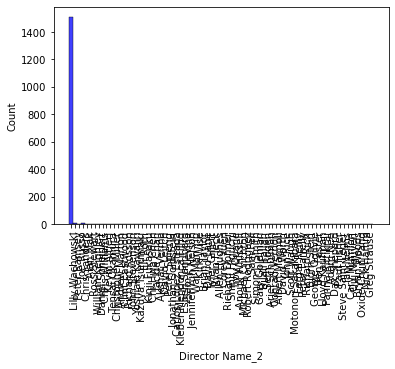



The Histogram Diagram for the attribute "Duration" is
 AxesSubplot(0.125,0.125;0.775x0.755)


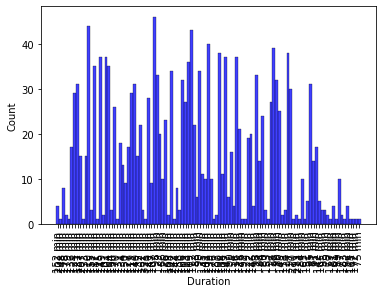



The Histogram Diagram for the attribute "Year" is
 AxesSubplot(0.125,0.125;0.775x0.755)


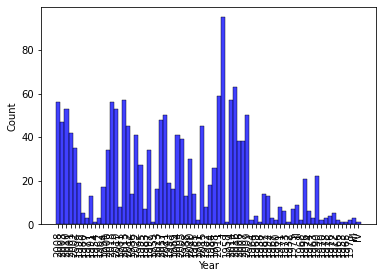



The Histogram Diagram for the attribute "Ratings" is
 AxesSubplot(0.125,0.125;0.775x0.755)


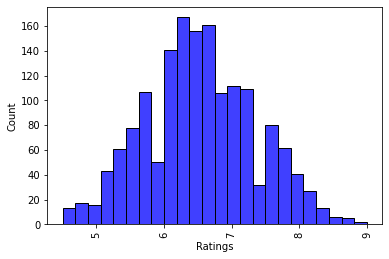



The Histogram Diagram for the attribute "Metascore" is
 AxesSubplot(0.125,0.125;0.775x0.755)


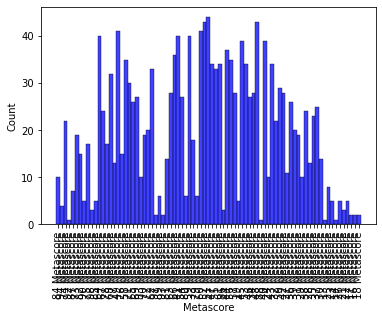



The Histogram Diagram for the attribute "Star1" is
 AxesSubplot(0.125,0.125;0.775x0.755)


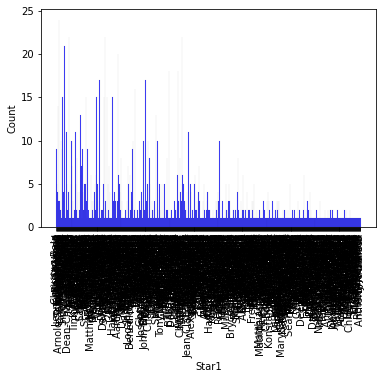



The Histogram Diagram for the attribute "Star2" is
 AxesSubplot(0.125,0.125;0.775x0.755)


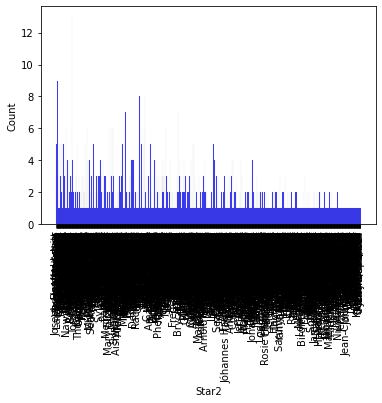



The Histogram Diagram for the attribute "Star3" is
 AxesSubplot(0.125,0.125;0.775x0.755)


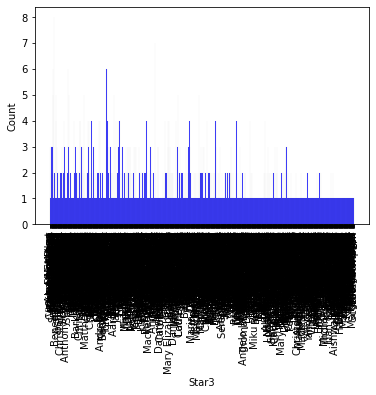



The Histogram Diagram for the attribute "Star4" is
 AxesSubplot(0.125,0.125;0.775x0.755)


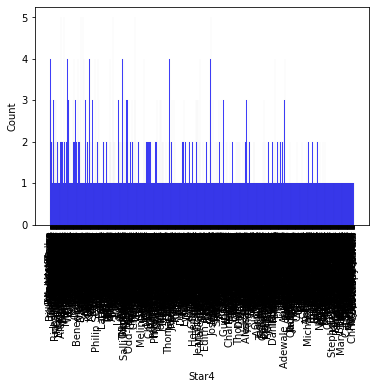



The Histogram Diagram for the attribute "Votes" is
 AxesSubplot(0.125,0.125;0.775x0.755)


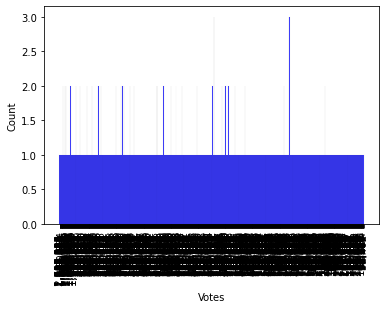



The Histogram Diagram for the attribute "Genre1" is
 AxesSubplot(0.125,0.125;0.775x0.755)


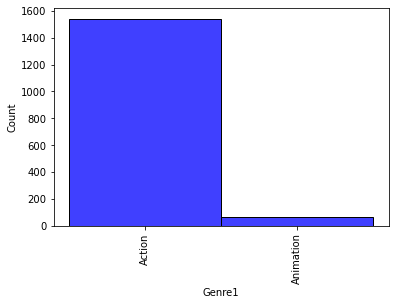



The Histogram Diagram for the attribute "Genre2" is
 AxesSubplot(0.125,0.125;0.775x0.755)


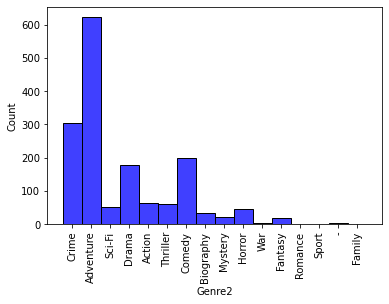



The Histogram Diagram for the attribute "Genre3" is
 AxesSubplot(0.125,0.125;0.775x0.755)


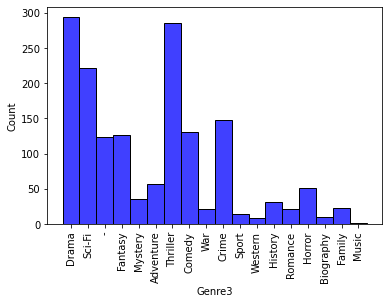



The Histogram Diagram for the attribute "Gross Collection" is
 AxesSubplot(0.125,0.125;0.775x0.755)


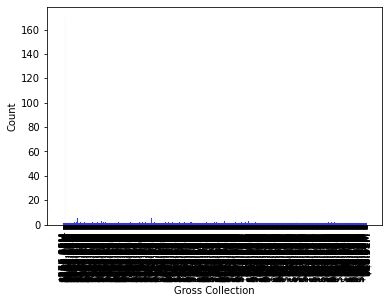



The Histogram Diagram for the attribute "Certification" is
 AxesSubplot(0.125,0.125;0.775x0.755)


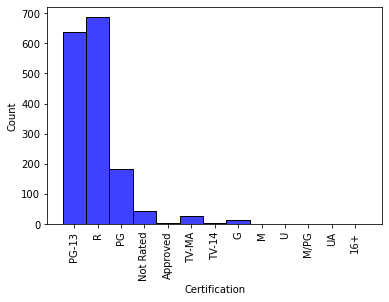

In [21]:
for i in df.columns:
    print(f'The Histogram Diagram for the attribute "{i}" is\n {sns.histplot(df[i],color="b")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

The Scatter Plot for the attribute "Gross Collection" & "Movie Name" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


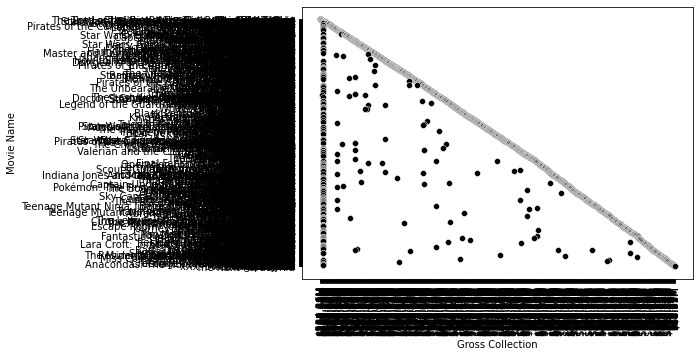



The Scatter Plot for the attribute "Gross Collection" & "Director Name_1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


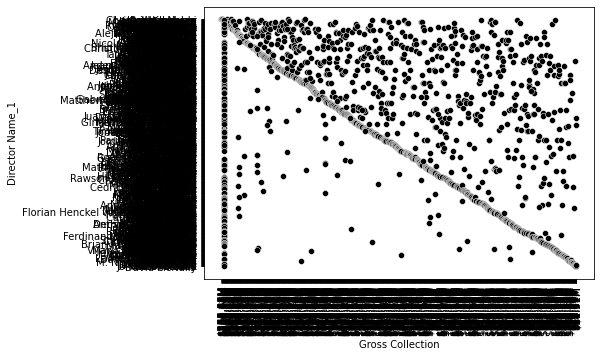



The Scatter Plot for the attribute "Gross Collection" & "Director Name_2" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


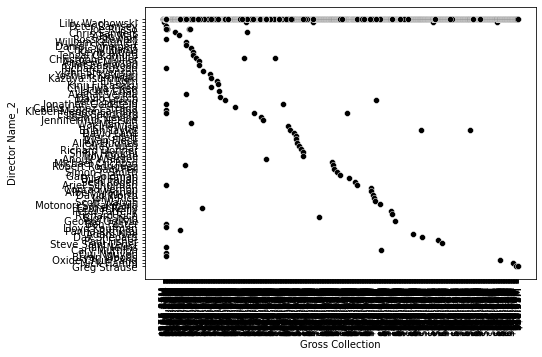



The Scatter Plot for the attribute "Gross Collection" & "Duration" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


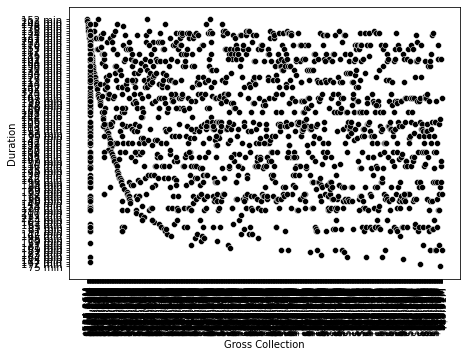



The Scatter Plot for the attribute "Gross Collection" & "Year" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


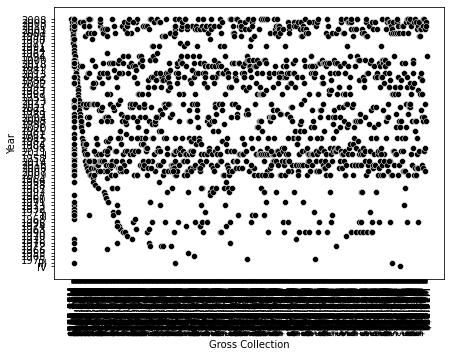



The Scatter Plot for the attribute "Gross Collection" & "Ratings" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


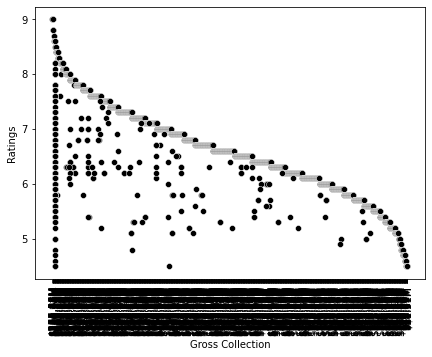



The Scatter Plot for the attribute "Gross Collection" & "Metascore" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


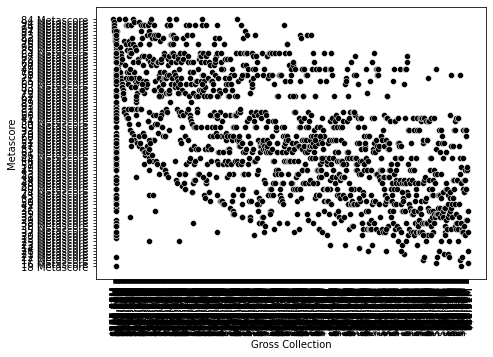



The Scatter Plot for the attribute "Gross Collection" & "Star1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


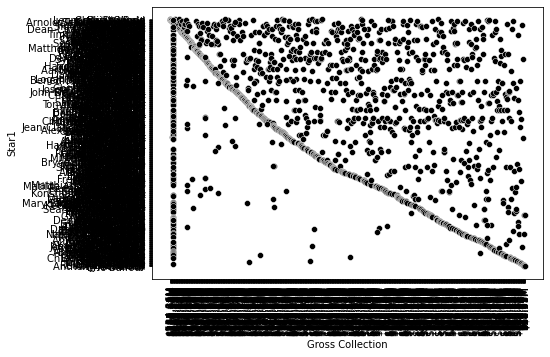



The Scatter Plot for the attribute "Gross Collection" & "Star2" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


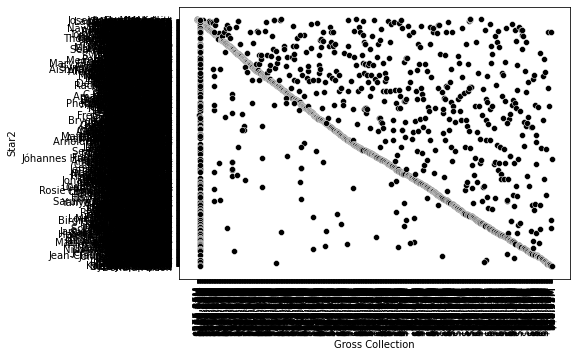



The Scatter Plot for the attribute "Gross Collection" & "Star3" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


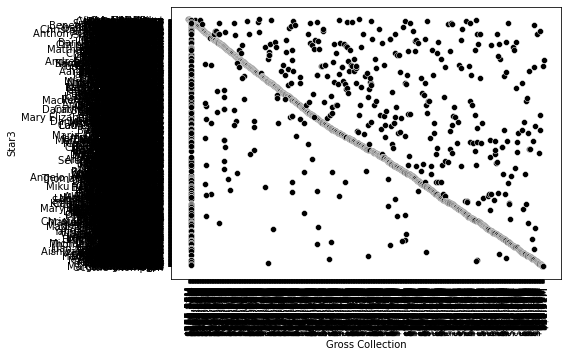



The Scatter Plot for the attribute "Gross Collection" & "Star4" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


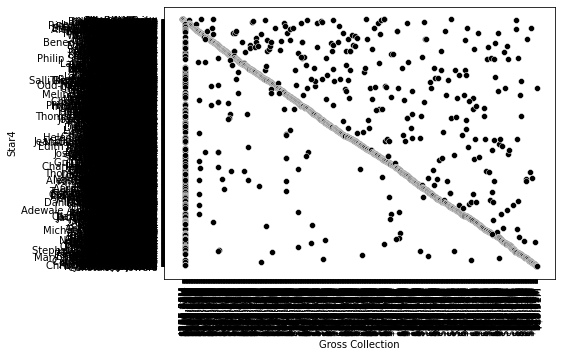



The Scatter Plot for the attribute "Gross Collection" & "Votes" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


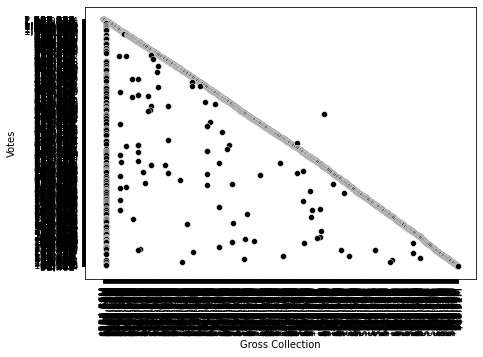



The Scatter Plot for the attribute "Gross Collection" & "Genre1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


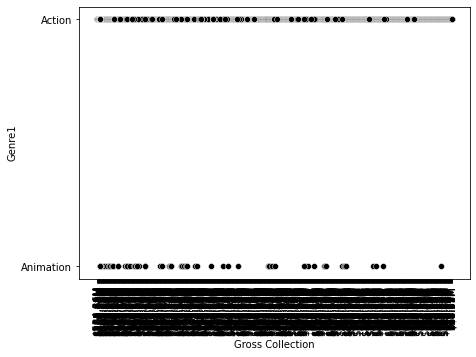



The Scatter Plot for the attribute "Gross Collection" & "Genre2" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


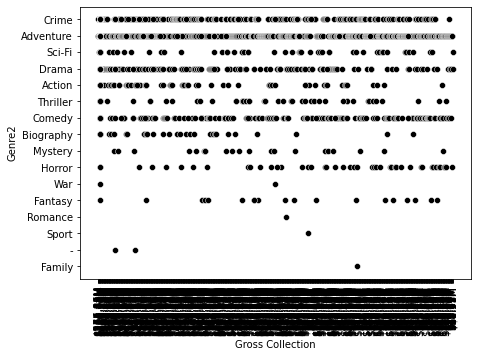



The Scatter Plot for the attribute "Gross Collection" & "Genre3" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


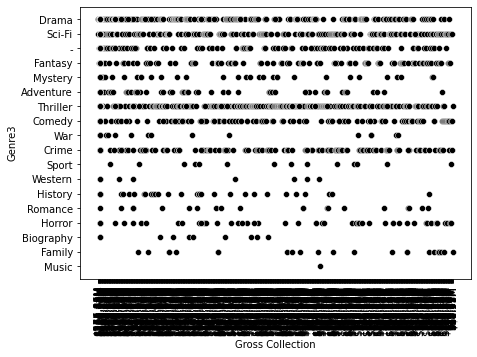



The Scatter Plot for the attribute "Gross Collection" & "Gross Collection" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


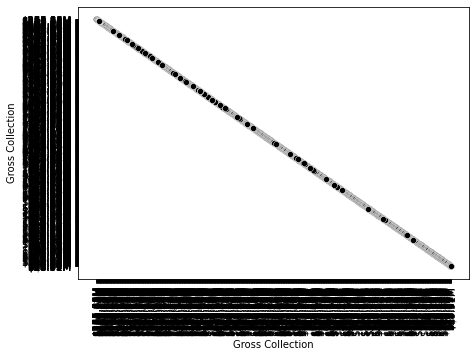



The Scatter Plot for the attribute "Gross Collection" & "Certification" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


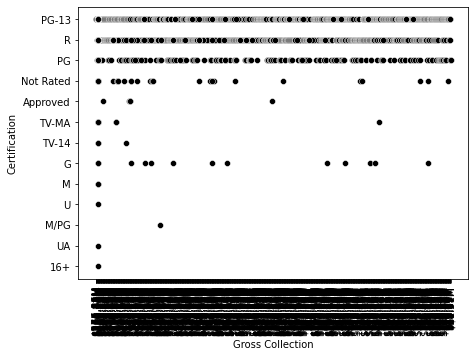

In [22]:
for i in df.columns:
    plt.figure(figsize=(7,5))
    print(f'The Scatter Plot for the attribute "Gross Collection" & "{i}" is-\n {sns.scatterplot(df["Gross Collection"], df[i], color="black")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')


The Line Plot for the attribute "Gross Collection" & "Movie Name" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


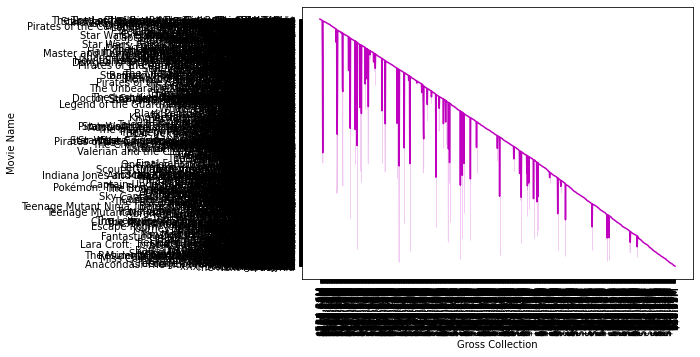



The Line Plot for the attribute "Gross Collection" & "Director Name_1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


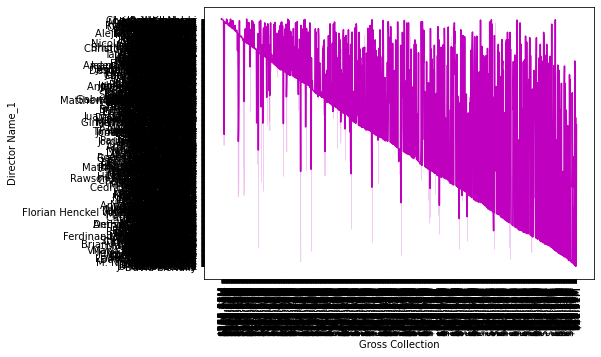



The Line Plot for the attribute "Gross Collection" & "Director Name_2" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


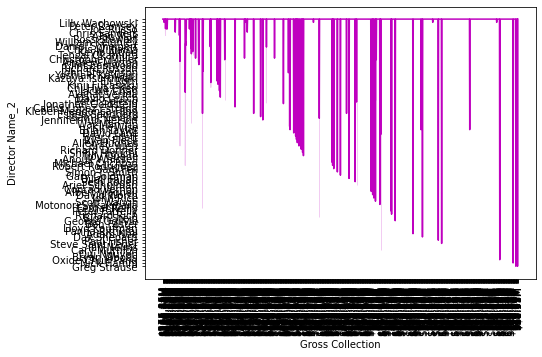



The Line Plot for the attribute "Gross Collection" & "Duration" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


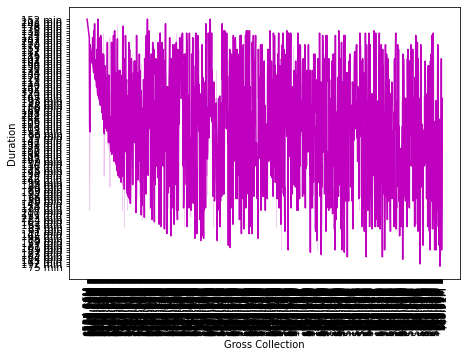



The Line Plot for the attribute "Gross Collection" & "Year" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


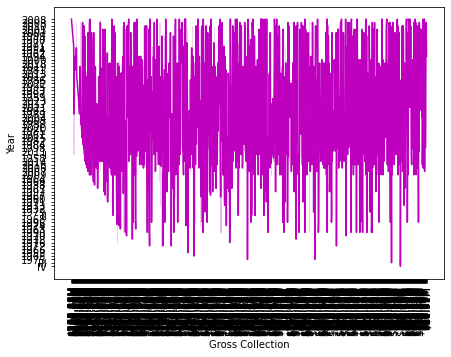



The Line Plot for the attribute "Gross Collection" & "Ratings" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


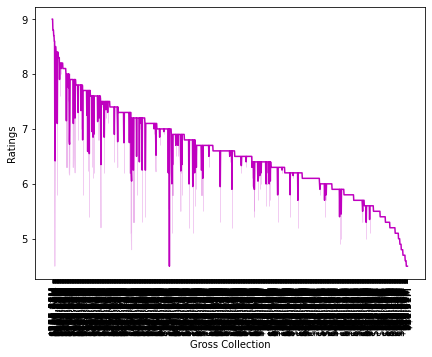



The Line Plot for the attribute "Gross Collection" & "Metascore" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


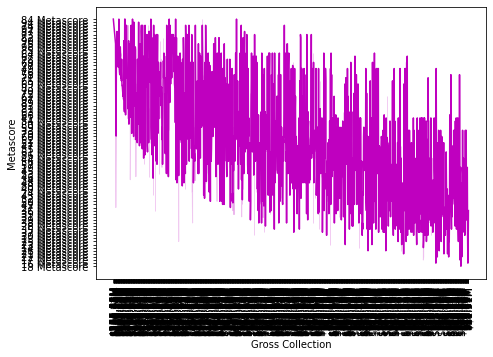



The Line Plot for the attribute "Gross Collection" & "Star1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


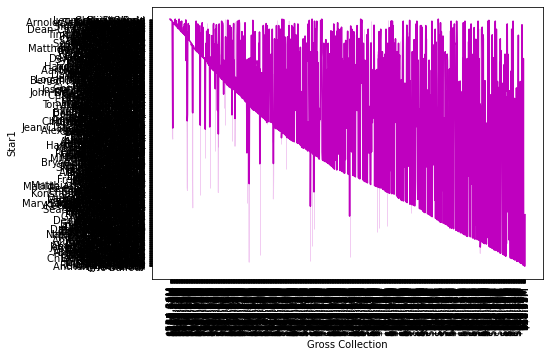



The Line Plot for the attribute "Gross Collection" & "Star2" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


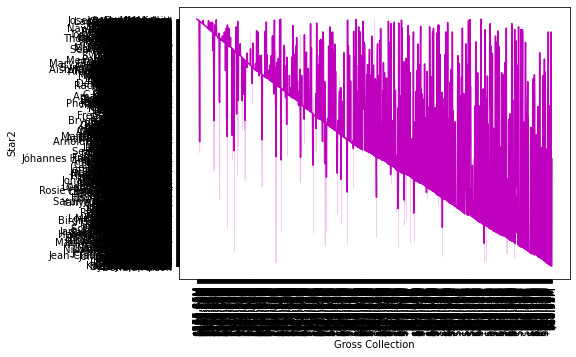



The Line Plot for the attribute "Gross Collection" & "Star3" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


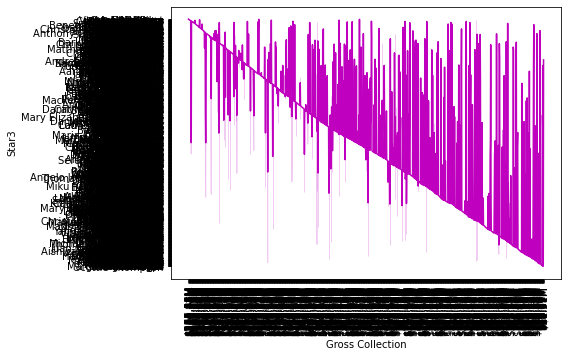



The Line Plot for the attribute "Gross Collection" & "Star4" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


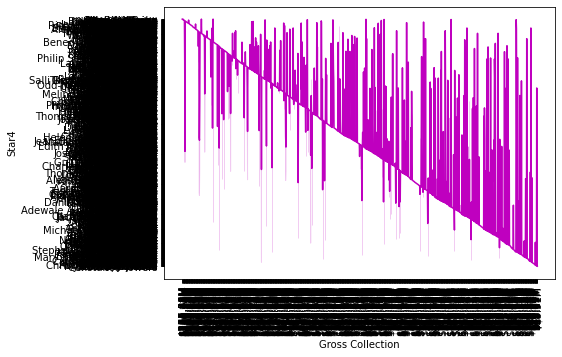



The Line Plot for the attribute "Gross Collection" & "Votes" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


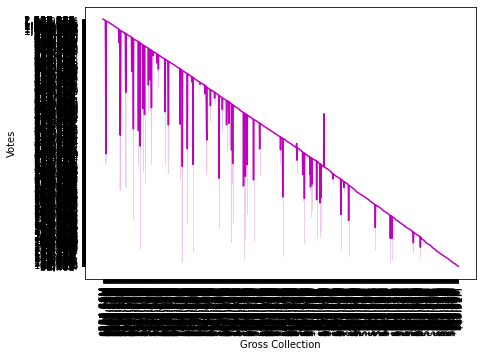



The Line Plot for the attribute "Gross Collection" & "Genre1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


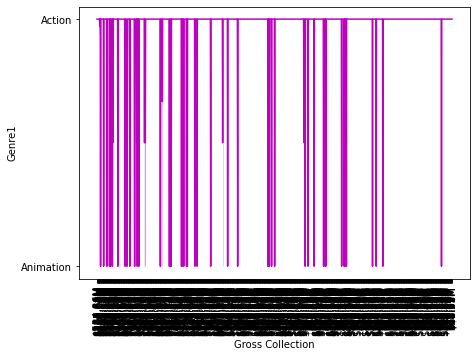



The Line Plot for the attribute "Gross Collection" & "Genre2" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


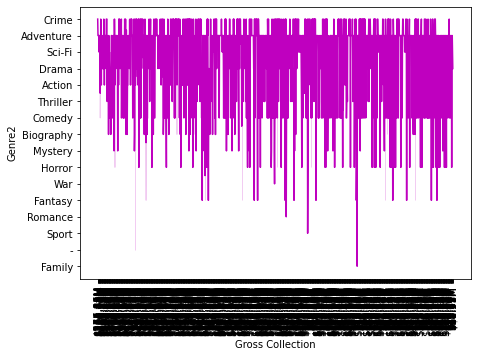



The Line Plot for the attribute "Gross Collection" & "Genre3" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


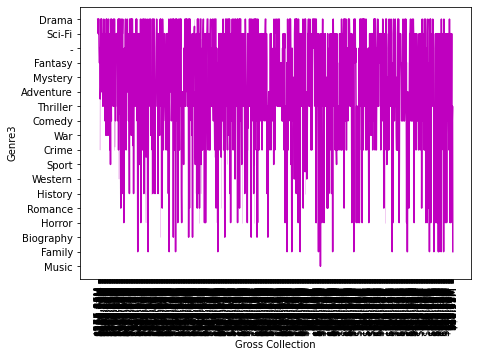



The Line Plot for the attribute "Gross Collection" & "Gross Collection" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


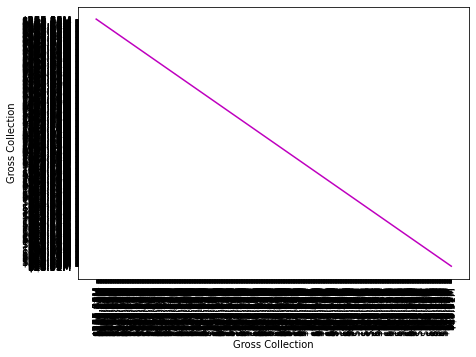



The Line Plot for the attribute "Gross Collection" & "Certification" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


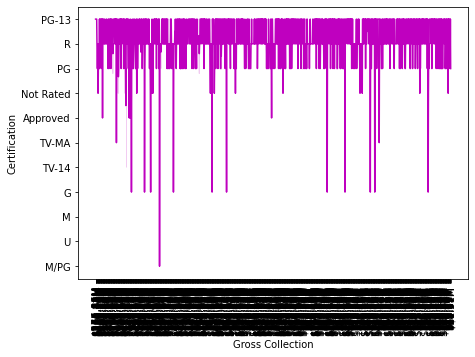

In [23]:
for i in df.columns:
    plt.figure(figsize=(7,5))
    print(f'The Line Plot for the attribute "Gross Collection" & "{i}" is-\n {sns.lineplot(df["Gross Collection"], df[i],color="m")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

# Label Encoding

In [24]:
import re
df['Duration'] = df['Duration'].apply(lambda x: re.findall(r'\d+', str(x))[0] if pd.notnull(x) else x)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce').fillna(-1).astype(int)

# Extract numeric values from 'Metascore' column
df['Metascore'] = df['Metascore'].apply(lambda x: re.findall(r'\d+', str(x))[0] if pd.notnull(x) else x)
df['Metascore'] = pd.to_numeric(df['Metascore'], errors='coerce').fillna(-1).astype(int)

# Replace non-finite values with a default value, such as -1
df['Duration'] = df['Duration'].replace([np.inf, -np.inf], -1).astype(int)
df['Metascore'] = df['Metascore'].replace([np.inf, -np.inf], -1).astype(int)


In [25]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [26]:
l=['Movie Name','Director Name_1','Director Name_2','Star1','Star2','Star3','Star4','Ratings','Genre1','Genre2','Genre3','Year','Certification','Gross Collection']
for j in l:
    df[j]=LabelEncoder().fit_transform(df[j].astype(str))

In [27]:
df.head()

Movie Name  Director Name_1  Director Name_2  Duration  Year  Ratings  \
0        1121              121               76       152    54       44   
1        1227              585               76       201    49       44   
2         519              121               76       148    56       43   
3        1226              585               76       178    47       43   
4        1228              585               76       179    48       43   

   Metascore  Star1  Star2  Star3  Star4        Votes  Genre1  Genre2  Genre3  \
0         84    103    364      2    791   2,718,552        0       5       5   
1         94    162    965    414    897   1,887,293        0       2       5   
2         74    361    503    314    638   2,413,311        0       2      13   
3         92    162    381    839   1065   1,915,945        0       2       5   
4         87    162    381   1106    897   1,703,466        0       2       5   

   Gross Collection  Certification  
0               982              7  
1               776              7  
2               615              7  
3               670              7  
4               724              7

In [28]:
df.describe()

Movie Name  Director Name_1  Director Name_2     Duration  \
count  1605.000000      1605.000000      1605.000000  1605.000000   
mean    744.437383       414.918380        73.633022   113.973209   
std     429.006389       223.732741        10.670386    19.609591   
min       0.000000         0.000000         0.000000    75.000000   
25%     381.000000       230.000000        76.000000   100.000000   
50%     739.000000       421.000000        76.000000   111.000000   
75%    1118.000000       613.000000        76.000000   124.000000   
max    1496.000000       785.000000        76.000000   321.000000   

              Year      Ratings    Metascore        Star1        Star2  \
count  1605.000000  1605.000000  1605.000000  1605.000000  1605.000000   
mean     52.374455    20.297196    53.895950   307.369470   515.172586   
std      13.575639     8.193089    15.709362   179.254225   290.215913   
min       0.000000     0.000000    13.000000     0.000000     0.000000   
25%      45.000000    15.000000    42.000000   147.000000   265.000000   
50%      55.000000    20.000000    53.000000   300.000000   513.000000   
75%      63.000000    26.000000    65.000000   471.000000   768.000000   
max      73.000000    44.000000    98.000000   614.000000  1020.000000   

             Star3        Star4       Genre1       Genre2       Genre3  \
count  1605.000000  1605.000000  1605.000000  1605.000000  1605.000000   
mean    570.428037   623.066667     0.039875     4.417445     7.958879   
std     335.198583   367.057923     0.195727     3.136972     5.142804   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     279.000000   303.000000     0.000000     2.000000     4.000000   
50%     557.000000   616.000000     0.000000     4.000000     7.000000   
75%     864.000000   946.000000     0.000000     5.000000    13.000000   
max    1157.000000  1252.000000     1.000000    15.000000    17.000000   

       Gross Collection  Certification  
count       1605.000000    1605.000000  
mean         684.087850       7.252336  
std          410.942816       1.070694  
min            0.000000       0.000000  
25%          323.000000       7.000000  
50%          692.000000       7.000000  
75%         1055.000000       8.000000  
max         1277.000000      12.000000

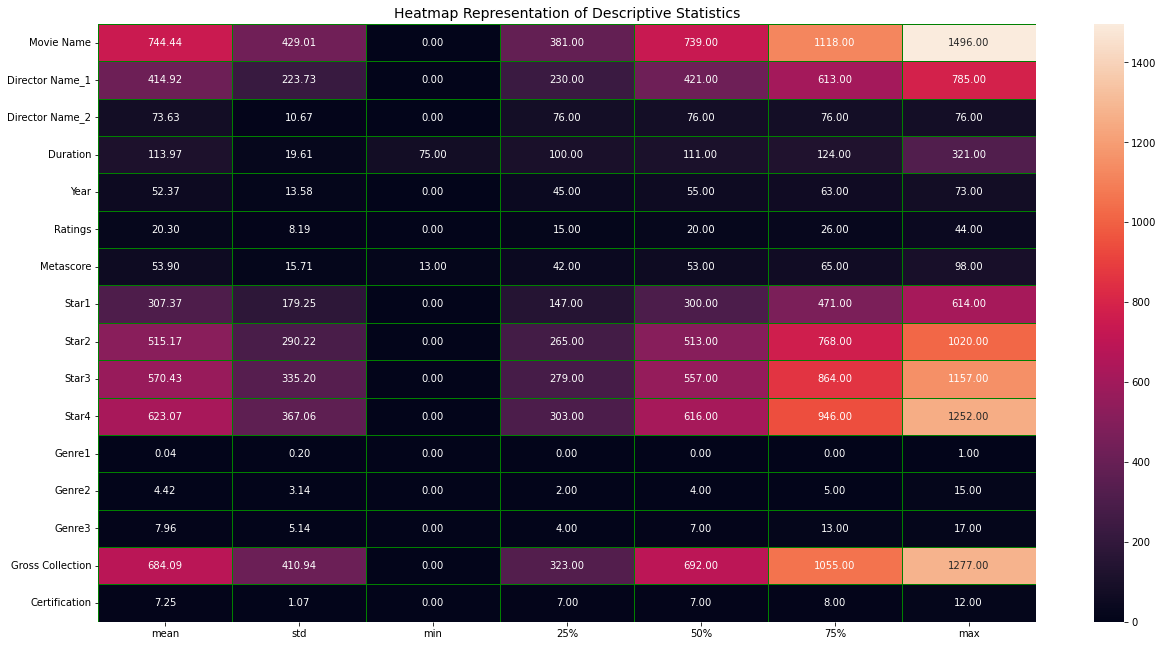

In [29]:
plt.figure(figsize=(21,11))
sns.heatmap(df.describe()[1:].transpose(),annot=True,linecolor='Green',linewidth='0.5',fmt='0.2f')
plt.title('Heatmap Representation of Descriptive Statistics',fontsize=14)
plt.show()

In [30]:
df.corr()

Movie Name  Director Name_1  Director Name_2  Duration  \
Movie Name          1.000000         0.010081         0.041745  0.022156   
Director Name_1     0.010081         1.000000         0.110692 -0.011405   
Director Name_2     0.041745         0.110692         1.000000  0.045176   
Duration            0.022156        -0.011405         0.045176  1.000000   
Year               -0.014212        -0.090503        -0.040329  0.039566   
Ratings             0.009846        -0.016092        -0.077724  0.370343   
Metascore          -0.007819        -0.037690        -0.066713  0.288845   
Star1               0.004335        -0.007345         0.025415  0.035387   
Star2              -0.010654         0.026700        -0.004195  0.041983   
Star3               0.025449        -0.004949         0.054732 -0.018856   
Star4               0.032411         0.017378         0.002875  0.035492   
Genre1             -0.003052        -0.049683        -0.213292 -0.140714   
Genre2              0.026708        -0.003744         0.044531 -0.101612   
Genre3              0.030159         0.035556         0.082819  0.052412   
Gross Collection    0.038558        -0.022194         0.030937  0.035906   
Certification      -0.085074         0.039171         0.088710 -0.108712   

                      Year   Ratings  Metascore     Star1     Star2     Star3  \
Movie Name       -0.014212  0.009846  -0.007819  0.004335 -0.010654  0.025449   
Director Name_1  -0.090503 -0.016092  -0.037690 -0.007345  0.026700 -0.004949   
Director Name_2  -0.040329 -0.077724  -0.066713  0.025415 -0.004195  0.054732   
Duration          0.039566  0.370343   0.288845  0.035387  0.041983 -0.018856   
Year              1.000000 -0.188325  -0.164196 -0.048514  0.001978 -0.044716   
Ratings          -0.188325  1.000000   0.745087  0.055331  0.000104 -0.020953   
Metascore        -0.164196  0.745087   1.000000  0.012740 -0.003819 -0.011637   
Star1            -0.048514  0.055331   0.012740  1.000000  0.005336  0.030323   
Star2             0.001978  0.000104  -0.003819  0.005336  1.000000  0.008749   
Star3            -0.044716 -0.020953  -0.011637  0.030323  0.008749  1.000000   
Star4            -0.015823  0.028625   0.036083  0.019860  0.028969  0.024102   
Genre1            0.051627  0.132952   0.125643 -0.007723 -0.036516 -0.020900   
Genre2            0.024742 -0.039809  -0.105627  0.002412 -0.017870  0.044244   
Genre3           -0.085611 -0.029983  -0.033251  0.049146 -0.019669  0.023408   
Gross Collection  0.062133 -0.041438  -0.034629 -0.012006 -0.038523 -0.019909   
Certification     0.225066 -0.031794  -0.108560 -0.068808  0.014490  0.029859   

                     Star4    Genre1    Genre2    Genre3  Gross Collection  \
Movie Name        0.032411 -0.003052  0.026708  0.030159          0.038558   
Director Name_1   0.017378 -0.049683 -0.003744  0.035556         -0.022194   
Director Name_2   0.002875 -0.213292  0.044531  0.082819          0.030937   
Duration          0.035492 -0.140714 -0.101612  0.052412          0.035906   
Year             -0.015823  0.051627  0.024742 -0.085611          0.062133   
Ratings           0.028625  0.132952 -0.039809 -0.029983         -0.041438   
Metascore         0.036083  0.125643 -0.105627 -0.033251         -0.034629   
Star1             0.019860 -0.007723  0.002412  0.049146         -0.012006   
Star2             0.028969 -0.036516 -0.017870 -0.019669         -0.038523   
Star3             0.024102 -0.020900  0.044244  0.023408         -0.019909   
Star4             1.000000  0.023471 -0.021337 -0.002613          0.011997   
Genre1            0.023471  1.000000 -0.222083 -0.261599         -0.031482   
Genre2           -0.021337 -0.222083  1.000000  0.060152          0.020289   
Genre3           -0.002613 -0.261599  0.060152  1.000000         -0.018682   
Gross Collection  0.011997 -0.031482  0.020289 -0.018682          1.000000   
Certification    -0.050162 -0.167042  0.210107  0.051364          0.014061   

                  Ce

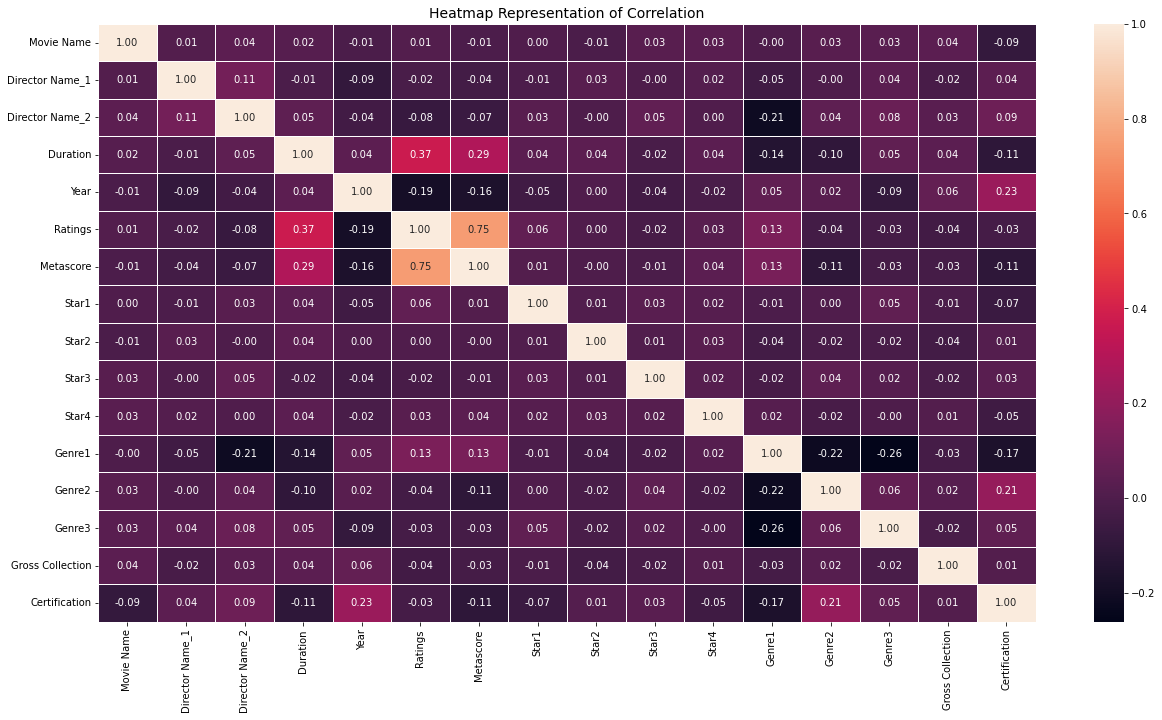

In [31]:
plt.figure(figsize=(21,11))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidth='1',fmt='0.2f')
plt.title('Heatmap Representation of Correlation',fontsize=14)
plt.show()

# Skewness

In [32]:
df.skew().sort_values()

Director Name_2    -4.867203
Certification      -1.775264
Year               -1.027643
Director Name_1    -0.123569
Gross Collection   -0.056186
Star2              -0.006157
Star4               0.012630
Movie Name          0.020341
Star1               0.033815
Star3               0.048436
Ratings             0.116966
Metascore           0.131064
Genre3              0.157206
Genre2              1.554033
Duration            1.808023
Genre1              4.707555
dtype: float64

# Distribution Plot

The Distribution Plot for attribute Movie Name is-
 AxesSubplot(0.125,0.125;0.775x0.755)


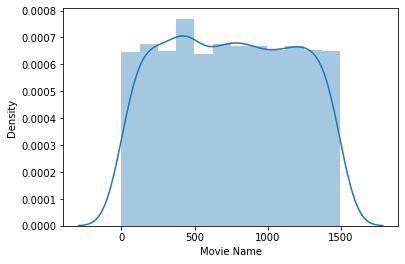



The Distribution Plot for attribute Director Name_1 is-
 AxesSubplot(0.125,0.125;0.775x0.755)


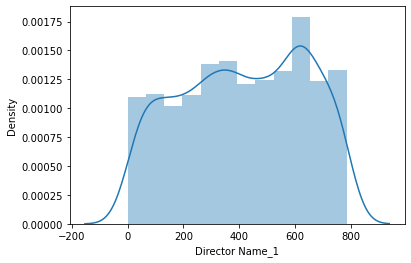



The Distribution Plot for attribute Director Name_2 is-
 AxesSubplot(0.125,0.125;0.775x0.755)


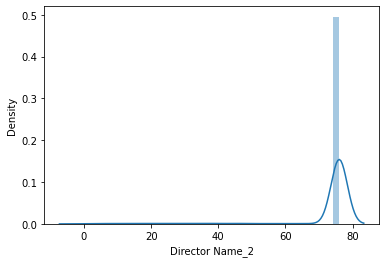



The Distribution Plot for attribute Duration is-
 AxesSubplot(0.125,0.125;0.775x0.755)


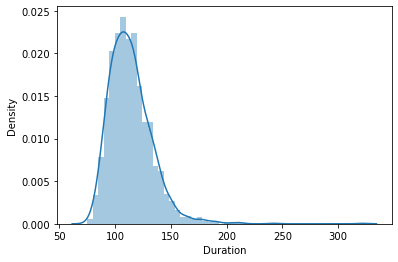



The Distribution Plot for attribute Year is-
 AxesSubplot(0.125,0.125;0.775x0.755)


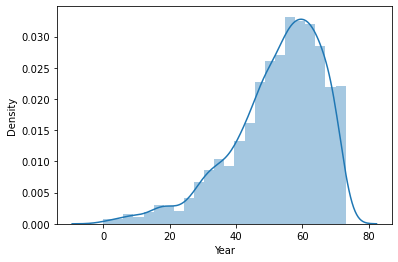



The Distribution Plot for attribute Ratings is-
 AxesSubplot(0.125,0.125;0.775x0.755)


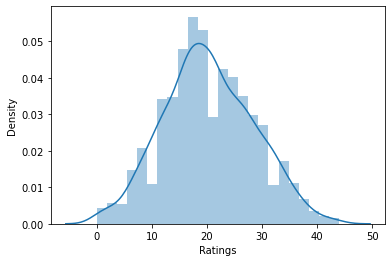



The Distribution Plot for attribute Metascore is-
 AxesSubplot(0.125,0.125;0.775x0.755)


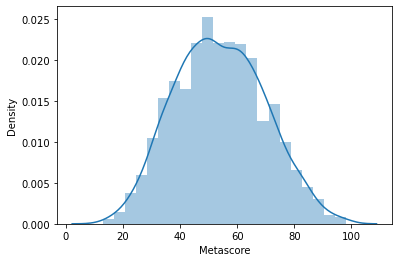



The Distribution Plot for attribute Star1 is-
 AxesSubplot(0.125,0.125;0.775x0.755)


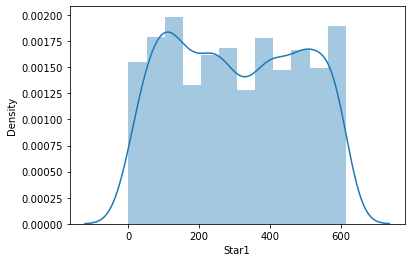



The Distribution Plot for attribute Star2 is-
 AxesSubplot(0.125,0.125;0.775x0.755)


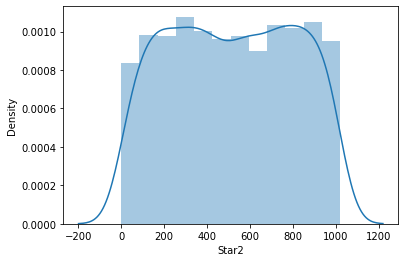



The Distribution Plot for attribute Star3 is-
 AxesSubplot(0.125,0.125;0.775x0.755)


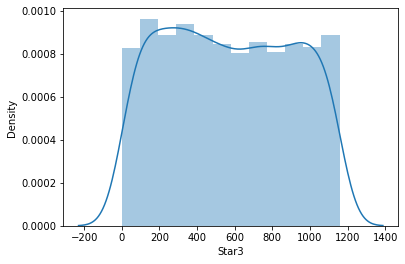



The Distribution Plot for attribute Star4 is-
 AxesSubplot(0.125,0.125;0.775x0.755)


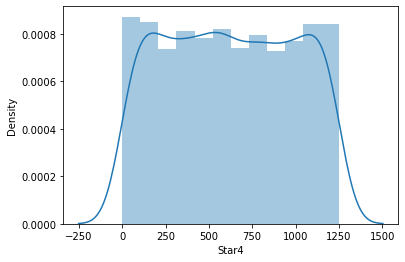

ValueError: could not convert string to float: ' 2,718,552 '

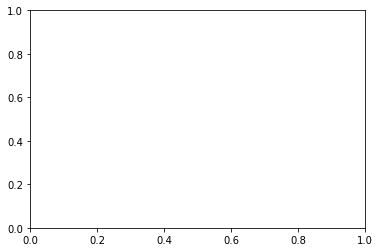

In [33]:
for i in df.columns:
    print(f'The Distribution Plot for attribute {i} is-\n {sns.distplot(df[i])}')
    plt.show()
    print('\n')

# Outliers

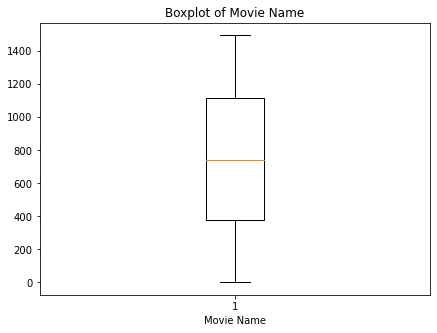

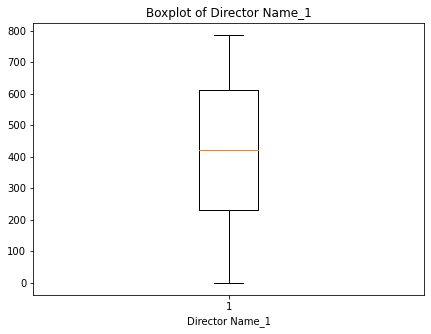

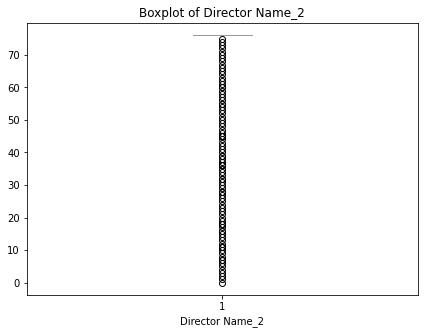

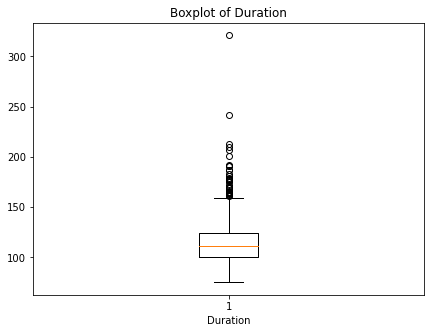

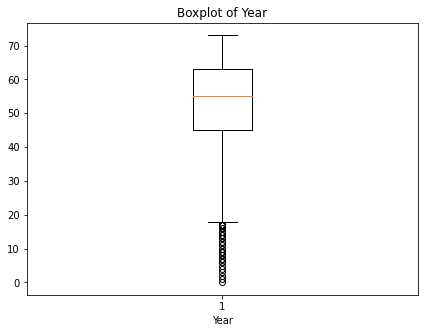

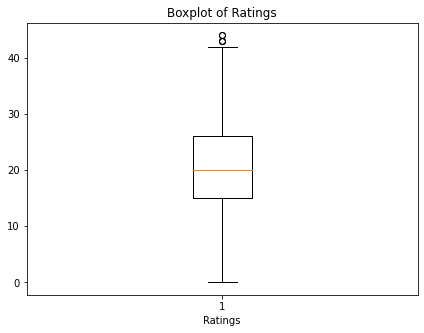

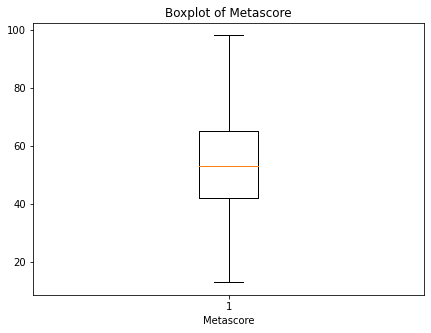

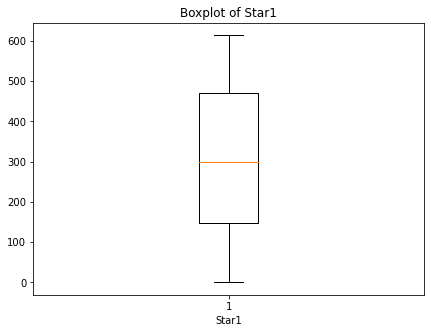

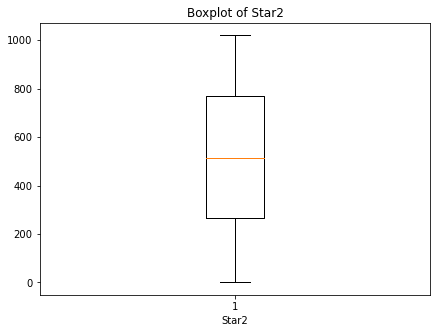

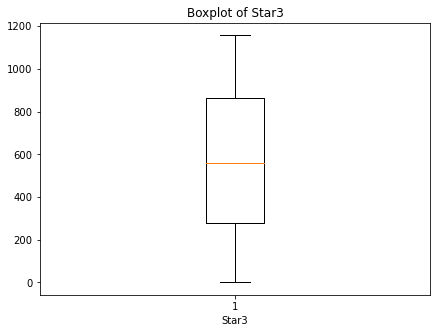

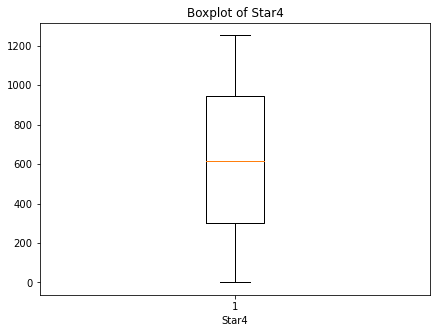

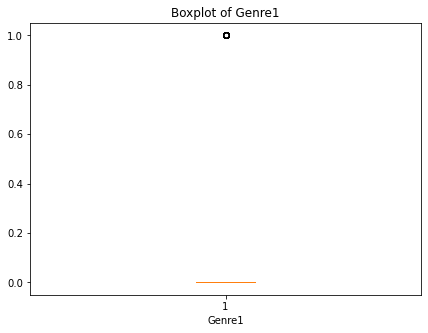

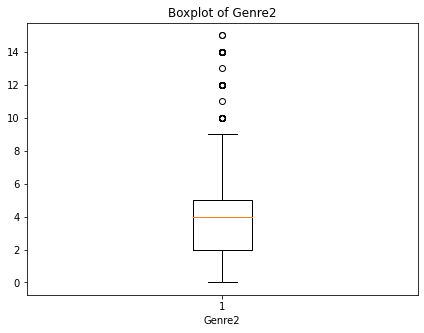

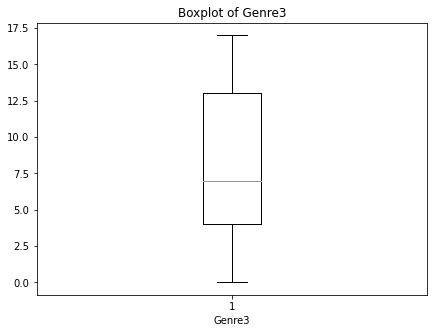

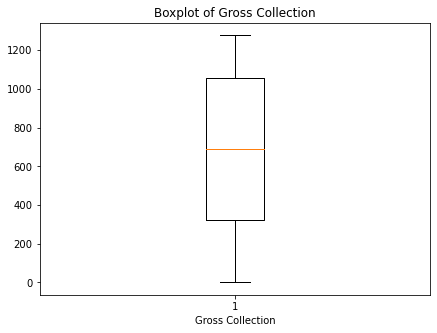

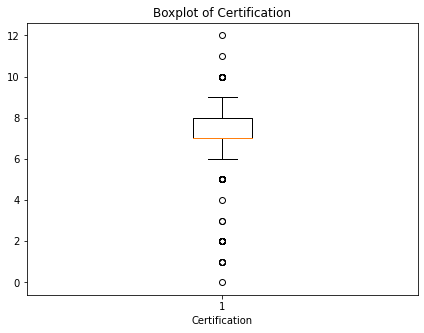

In [34]:
for col in df.select_dtypes(include='number'):
    plt.figure(figsize=(7, 5))
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.title(f'Boxplot of {col}')
    plt.show()

# Data Cleaning

# Removing outliers

In [35]:
from numpy import percentile
columns=df.columns
for j in columns:
    if isinstance(df[j][0],str):
        continue
    else:
        quartiles=percentile(df[j],[25,75])
        lower_fence=quartiles[0]-(1.5*(quartiles[1]-quartiles[0]))
        upper_fence=quartiles[1]+(1.5*(quartiles[1]-quartiles[0]))
        df[j]=df[j].apply(lambda x: upper_fence if x> upper_fence else (lower_fence if x < lower_fence else x))

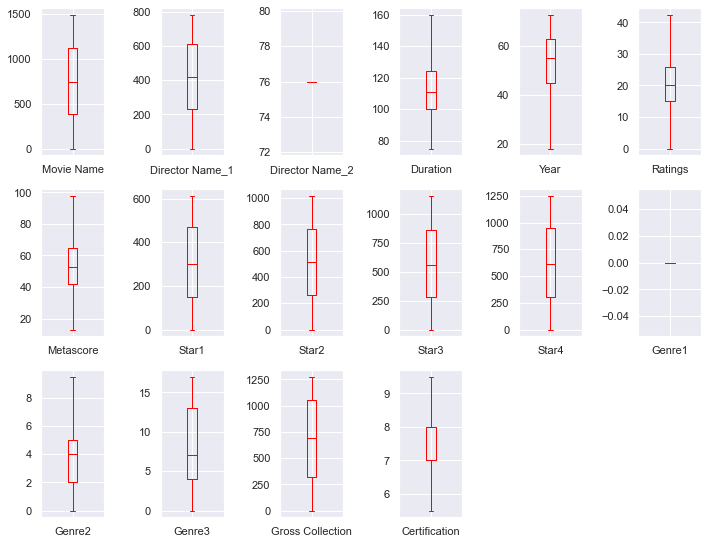

In [36]:
sns.set(style="darkgrid")
df.plot(kind='box',subplots=True,layout=(6,6),figsize=(10,15),color='red')
plt.tight_layout()


# Removing Skewness

In [37]:
numerical_columns = df.select_dtypes(include='number').columns

# Apply log transformation to reduce skewness
df_transformed = df.copy()
df_transformed[numerical_columns] = np.log1p(df_transformed[numerical_columns])

# Print the transformed dataframe
print(df_transformed)

      Movie Name  Director Name_1  Director Name_2  Duration      Year  \
0       7.022868         4.804021         4.343805  5.030438  4.007333   
1       7.113142         6.373320         4.343805  5.081404  3.912023   
2       6.253829         4.804021         4.343805  5.003946  4.043051   
3       7.112327         6.373320         4.343805  5.081404  3.871201   
4       7.113956         6.373320         4.343805  5.081404  3.891820   
...          ...              ...              ...       ...       ...   
1777    6.883463         6.376727         4.343805  4.543295  3.806662   
1778    7.310550         6.102559         4.343805  4.624973  3.951244   
1779    6.371612         5.099866         4.343805  4.499810  3.912023   
1780    6.856462         4.852030         4.343805  4.532599  4.043051   
1781    7.141245         4.779123         4.343805  4.682131  3.713572   

       Ratings  Metascore     Star1     Star2     Star3     Star4  \
0     3.772761   4.442651  4.644391  5.899

Taking target column as Gross collection

# Min Max Scaler

In [38]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()

In [39]:
y=df_transformed['Gross Collection']
y

0       6.890609
1       6.655440
2       6.423247
3       6.508769
4       6.586172
          ...   
1777    5.968708
1778    6.356108
1779    6.995766
1780    6.131226
1781    7.089243
Name: Gross Collection, Length: 1605, dtype: float64

In [40]:


# Remove commas from numerical values
df_transformed[numerical_columns] = df_transformed[numerical_columns].replace(',', '', regex=True)

# Convert the numerical columns to numeric data type
df_transformed[numerical_columns] = df_transformed[numerical_columns].apply(pd.to_numeric)

# Select numerical columns for scaling
numerical_columns = df_transformed.select_dtypes(include='number').columns

# Create a subset of the dataframe with only numerical columns
x = df_transformed[numerical_columns]

# Apply MinMaxScaler to scale the numerical columns
mn = MinMaxScaler()
x_scaled = mn.fit_transform(x)

# Create a new dataframe with the scaled values
df_scaled = pd.DataFrame(x_scaled, columns=numerical_columns)

# Print the scaled dataframe
print(df_scaled)


      Movie Name  Director Name_1  Director Name_2  Duration      Year  \
0       0.960561         0.720572              0.0  0.932105  0.781755   
1       0.972908         0.955956              0.0  1.000000  0.711654   
2       0.855374         0.720572              0.0  0.896815  0.808025   
3       0.972796         0.955956              0.0  1.000000  0.681630   
4       0.973019         0.955956              0.0  1.000000  0.696795   
...          ...              ...              ...       ...       ...   
1600    0.941493         0.956467              0.0  0.283162  0.634162   
1601    0.999909         0.915344              0.0  0.391969  0.740501   
1602    0.871484         0.764947              0.0  0.225234  0.711654   
1603    0.937800         0.727773              0.0  0.268914  0.808025   
1604    0.976752         0.716837              0.0  0.468112  0.565695   

      Ratings  Metascore     Star1     Star2     Star3     Star4  Genre1  \
0         1.0   0.922053  0.723243 

# Training_Testing Phase

In [48]:
#importing machine learning libraries for Classification model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,r2_score,mean_squared_error,mean_absolute_error
lr=LogisticRegression()
from sklearn.model_selection import cross_val_score


In [42]:
#importing other libraries
from sklearn.linear_model import Lasso,Ridge,ElasticNet,SGDRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
ls=Lasso()
rd=Ridge()
en=ElasticNet()
sgd=SGDRegressor()
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
grd=GradientBoostingRegressor()

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
#creating a definition to expand the model individually
def model(m,x,y):
    m.fit(x_train,y_train)
    train_pred=m.predict(x_train)
    test_pred=m.predict(x_test)
    print(f'Training Accuracy of model {m} is {r2_score(train_pred,y_train)}')
    print(f'Testing Accuracy of model {m} is {r2_score(test_pred,y_test)}')
    print('\nError in the model is calculated below-\n')
    print(f'The Mean Absolute Error is (MAE) {mean_absolute_error(test_pred,y_test)}')
    print(f'The Mean Squared Error is (MSE) {mean_squared_error(test_pred,y_test)}')
    print(f'The Root Mean Squared Error is (RMSE) {np.sqrt(mean_squared_error(test_pred,y_test))}')
    print('\n')
    print('Finding out the best K-Fold Value')
    print('\n\t')
    for j in range(2,5):
        cvs=cross_val_score(m,x,y,cv=j)
        cvs.mean()
        cvs.std()
        print(f'At K-Fold {j} the CV Score of model {m} is {cvs.mean()*100} & std is {cvs.std()}')
        print('\n')
    print('\n\t')
    plt.scatter(y_test,test_pred,color='c')
    plt.plot(y_test,y_test,color='m')
    plt.xlabel("Actual Gross Collection",fontsize=15)
    plt.ylabel("Predicted Gross Collection",fontsize=15)
    plt.title(f"Best Fitted Line for the model {m}",fontsize=18)
    plt.show()

Training Accuracy of model Lasso() is -2.60128225677547
Testing Accuracy of model Lasso() is -2.614963958644666

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 0.522193430120419
The Mean Squared Error is (MSE) 0.5091789286859392
The Root Mean Squared Error is (RMSE) 0.7135677463884835


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Lasso() is 52.49493780472855 & std is 0.037971118916807156


At K-Fold 3 the CV Score of model Lasso() is 52.163892545615255 & std is 0.03775588930908072


At K-Fold 4 the CV Score of model Lasso() is 52.23830253314576 & std is 0.048230306144082684



	


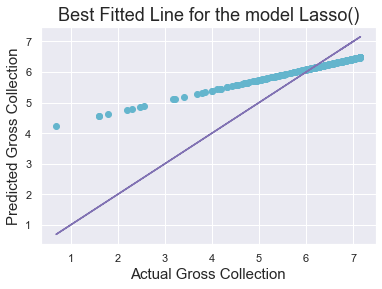

In [50]:
model(ls,x,y)

Training Accuracy of model Ridge() is 0.9999997338774899
Testing Accuracy of model Ridge() is 0.9999997216328644

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 0.0004228319258851838
The Mean Squared Error is (MSE) 3.288842111547097e-07
The Root Mean Squared Error is (RMSE) 0.0005734842728050262


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Ridge() is 99.99992318127183 & std is 6.458372742157437e-08


At K-Fold 3 the CV Score of model Ridge() is 99.99995647140905 & std is 3.2573394947910405e-08


At K-Fold 4 the CV Score of model Ridge() is 99.99996586369181 & std is 3.291505808673479e-08



	


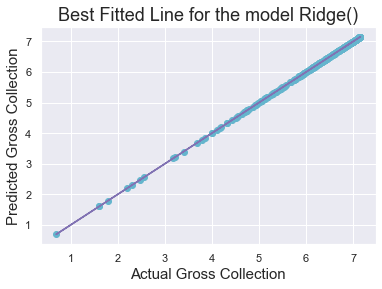

In [51]:
model(rd,x,y)

Training Accuracy of model ElasticNet() is 0.05180133779431495
Testing Accuracy of model ElasticNet() is 0.04819901770827906

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 0.39338097750492096
The Mean Squared Error is (MSE) 0.2889577362200062
The Root Mean Squared Error is (RMSE) 0.5375478920245211


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model ElasticNet() is 73.7215835580234 & std is 0.015639138892139415


At K-Fold 3 the CV Score of model ElasticNet() is 73.54266769864935 & std is 0.015601422081826667


At K-Fold 4 the CV Score of model ElasticNet() is 73.60632682667293 & std is 0.019286869287327375



	


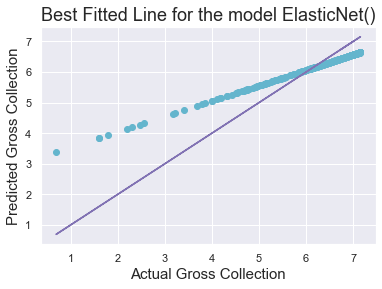

In [52]:
model(en,x,y)

Training Accuracy of model SGDRegressor() is 0.9967319445094475
Testing Accuracy of model SGDRegressor() is 0.9950394823156979

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 0.06086763983062377
The Mean Squared Error is (MSE) 0.005797440465294613
The Root Mean Squared Error is (RMSE) 0.07614092503571658


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model SGDRegressor() is 99.28416948465383 & std is 0.0008821433463825912


At K-Fold 3 the CV Score of model SGDRegressor() is 98.81924559671127 & std is 0.014416106893923962


At K-Fold 4 the CV Score of model SGDRegressor() is 99.94574547034952 & std is 0.00013453796475604806



	


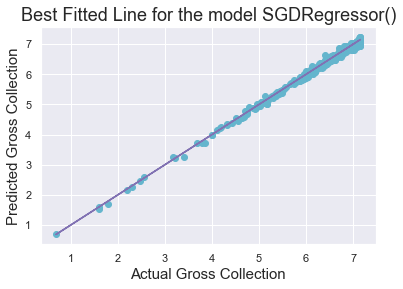

In [53]:
model(sgd,x,y)

Training Accuracy of model RandomForestRegressor() is 0.9999610506141784
Testing Accuracy of model RandomForestRegressor() is 0.999940058224437

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 0.002838551605031938
The Mean Squared Error is (MSE) 7.066200206011795e-05
The Root Mean Squared Error is (RMSE) 0.008406069358512215


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model RandomForestRegressor() is 99.85172351756535 & std is 0.0010393713805630367


At K-Fold 3 the CV Score of model RandomForestRegressor() is 99.93691403646855 & std is 0.0004772314004821694


At K-Fold 4 the CV Score of model RandomForestRegressor() is 99.94321587552324 & std is 0.0005527500787782045



	


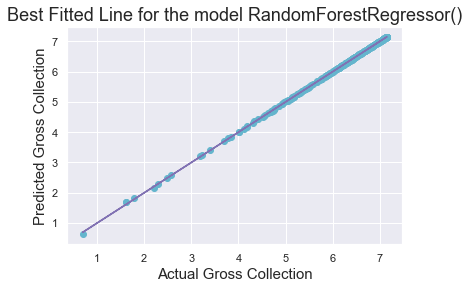

In [54]:
model(rf,x,y)

Training Accuracy of model AdaBoostRegressor() is 0.9919981460394335
Testing Accuracy of model AdaBoostRegressor() is 0.9898532953548306

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 0.08297324367677127
The Mean Squared Error is (MSE) 0.011637875373643074
The Root Mean Squared Error is (RMSE) 0.10787898485638003


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model AdaBoostRegressor() is 99.19804773026073 & std is 0.0007178514128085012


At K-Fold 3 the CV Score of model AdaBoostRegressor() is 99.20526691664536 & std is 0.002237586133842356


At K-Fold 4 the CV Score of model AdaBoostRegressor() is 99.179519202664 & std is 0.0024979752660492104



	


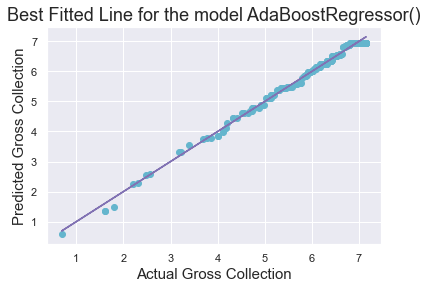

In [55]:
model(ad,x,y)

Training Accuracy of model GradientBoostingRegressor() is 0.9999604946890179
Testing Accuracy of model GradientBoostingRegressor() is 0.9998719312466807

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 0.008380119723176795
The Mean Squared Error is (MSE) 0.00015103231462119536
The Root Mean Squared Error is (RMSE) 0.012289520520394413


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model GradientBoostingRegressor() is 99.91750661810526 & std is 0.0006004769234946306


At K-Fold 3 the CV Score of model GradientBoostingRegressor() is 99.96346125562944 & std is 0.0003493549425989882


At K-Fold 4 the CV Score of model GradientBoostingRegressor() is 99.96025350576633 & std is 0.0004112266080389571



	


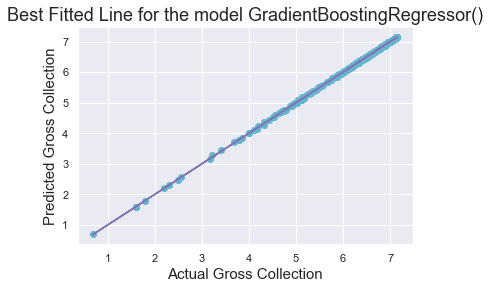

In [56]:
model(grd,x,y)

# Hyper Parameter Tuning

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
#defining all the parameters of the respective models
dict_ls={'alpha':[.0001,.001,.01,.1,1,10],'selection':['cyclic', 'random']}
dict_rd={'alpha':[.0001,.001,.01,.1,1,10],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga', 'lbfgs']}
dict_en={'alpha':[.0001,.001,.01,.1,1,10],'selection':['cyclic', 'random']}
dict_rf={'criterion' : ["squared_error", "absolute_error", "poisson"],'max_features':["sqrt", "log2", None]}
dict_ad={'loss':['linear', 'square', 'exponential']}
dict_grd={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],'criterion':['friedman_mse', 'squared_error', 'mse'],'max_features':['auto', 'sqrt', 'log2']}
dict_sgd={'alpha':[.0001,.001,.01,.1,1,10],'penalty':['l2', 'l1', 'elasticnet'],'learning_rate':['constant', 'optimal', 'invscaling','adaptive'],'loss':['squared_error','huber','epsilon_insensitive','squared_epsilon_insensitive']}


In [59]:
#Now I'm defining a function so that i can individuallay let the model perfom and give the best parameter out of it.
def HPT(machine,dictionary):
    grd=GridSearchCV(machine,dictionary)
    grd.fit(x,y)
    print(f'The best Parameters of the model {machine} are {grd.best_params_}')

In [60]:
HPT(ls,dict_ls)

The best Parameters of the model Lasso() are {'alpha': 0.0001, 'selection': 'cyclic'}


In [61]:
HPT(rd,dict_rd)

The best Parameters of the model Ridge() are {'alpha': 0.0001, 'solver': 'auto'}


In [62]:
HPT(en,dict_en)

The best Parameters of the model ElasticNet() are {'alpha': 0.0001, 'selection': 'cyclic'}


In [64]:
HPT(ad,dict_ad)

The best Parameters of the model AdaBoostRegressor() are {'loss': 'square'}


In [65]:
#Redefining the models after getting the parameters
ls=Lasso(alpha=0.01,selection='random')
rd=Ridge(alpha=0.0001,solver='saga')
en=ElasticNet(alpha=0.1,selection='random')
rf=RandomForestRegressor(criterion='poisson',max_features='sqrt')
ad=AdaBoostRegressor(loss='linear')
grd=GradientBoostingRegressor(criterion='friedman_mse',loss='squared_error',max_features='sqrt')
sgd=SGDRegressor(alpha=0.01,learning_rate='optimal',penalty='l2',loss='squared_error')

Training Accuracy of model Lasso(alpha=0.01, selection='random') is 0.9999565433673745
Testing Accuracy of model Lasso(alpha=0.01, selection='random') is 0.9999563782704315

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 0.005221934301204066
The Mean Squared Error is (MSE) 5.0917892868592545e-05
The Root Mean Squared Error is (RMSE) 0.00713567746388474


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Lasso(alpha=0.01, selection='random') is 99.99486311743868 & std is 7.660875309623005e-06


At K-Fold 3 the CV Score of model Lasso(alpha=0.01, selection='random') is 99.99512500139572 & std is 4.686010641968641e-06


At K-Fold 4 the CV Score of model Lasso(alpha=0.01, selection='random') is 99.99180157359035 & std is 5.465170359062915e-05



	


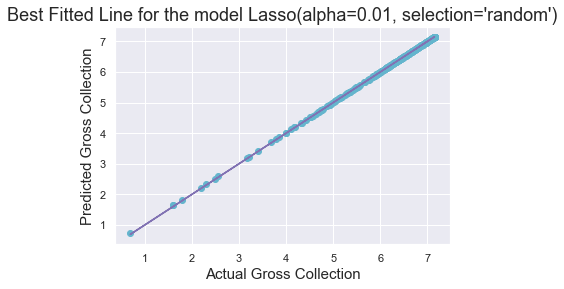

In [66]:
model(ls,x,y)

Training Accuracy of model Ridge(alpha=0.0001, solver='saga') is 0.999999042942181
Testing Accuracy of model Ridge(alpha=0.0001, solver='saga') is 0.9999986624845908

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 0.0010052831898092458
The Mean Squared Error is (MSE) 1.5821156655831737e-06
The Root Mean Squared Error is (RMSE) 0.0012578217940484152


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Ridge(alpha=0.0001, solver='saga') is 99.99906655795958 & std is 8.68647934798572e-06


At K-Fold 3 the CV Score of model Ridge(alpha=0.0001, solver='saga') is 99.99973450808378 & std is 2.074556335573791e-06


At K-Fold 4 the CV Score of model Ridge(alpha=0.0001, solver='saga') is 99.99984808462285 & std is 1.010974947866981e-06



	


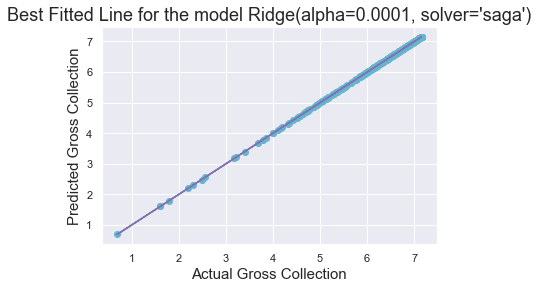

In [67]:
model(rd,x,y)

Training Accuracy of model ElasticNet(alpha=0.1, selection='random') is 0.9954157638762937
Testing Accuracy of model ElasticNet(alpha=0.1, selection='random') is 0.9953983478151603

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 0.050563638575250695
The Mean Squared Error is (MSE) 0.004774020204173865
The Root Mean Squared Error is (RMSE) 0.06909428488792589


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model ElasticNet(alpha=0.1, selection='random') is 99.55608176748558 & std is 0.0003430687350217121


At K-Fold 3 the CV Score of model ElasticNet(alpha=0.1, selection='random') is 99.55299763516614 & std is 0.00034133137394486265


At K-Fold 4 the CV Score of model ElasticNet(alpha=0.1, selection='random') is 99.55375445517961 & std is 0.0004342422530826644



	


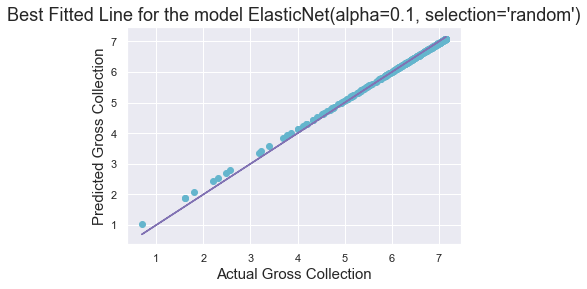

In [68]:
model(en,x,y)

Training Accuracy of model SGDRegressor(alpha=0.01, learning_rate='optimal') is -0.3347932748436324
Testing Accuracy of model SGDRegressor(alpha=0.01, learning_rate='optimal') is -0.32520690071081315

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 3904001364.0095162
The Mean Squared Error is (MSE) 2.335499947628919e+19
The Root Mean Squared Error is (RMSE) 4832701053.8920355


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model SGDRegressor(alpha=0.01, learning_rate='optimal') is -9.401734393498062e+21 & std is 3.251858286725793e+19


At K-Fold 3 the CV Score of model SGDRegressor(alpha=0.01, learning_rate='optimal') is -2.728197045375289e+20 & std is 1.332722182541163e+18


At K-Fold 4 the CV Score of model SGDRegressor(alpha=0.01, learning_rate='optimal') is -5.762240328205563e+21 & std is 8.700337304437642e+19



	


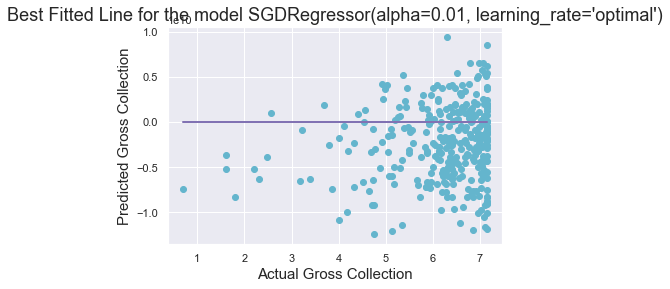

In [69]:
model(sgd,x,y)

Training Accuracy of model RandomForestRegressor(criterion='poisson', max_features='sqrt') is 0.8083399380283891
Testing Accuracy of model RandomForestRegressor(criterion='poisson', max_features='sqrt') is -1.5328928705817102

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 0.45608202911127727
The Mean Squared Error is (MSE) 0.6514769631153633
The Root Mean Squared Error is (RMSE) 0.8071412287297455


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model RandomForestRegressor(criterion='poisson', max_features='sqrt') is 15.553152286286704 & std is 0.05444552763335592


At K-Fold 3 the CV Score of model RandomForestRegressor(criterion='poisson', max_features='sqrt') is 19.297740955182093 & std is 0.14647861492581163


At K-Fold 4 the CV Score of model RandomForestRegressor(criterion='poisson', max_features='sqrt') is 20.53028943115593 & std is 0.1833506986577891



	


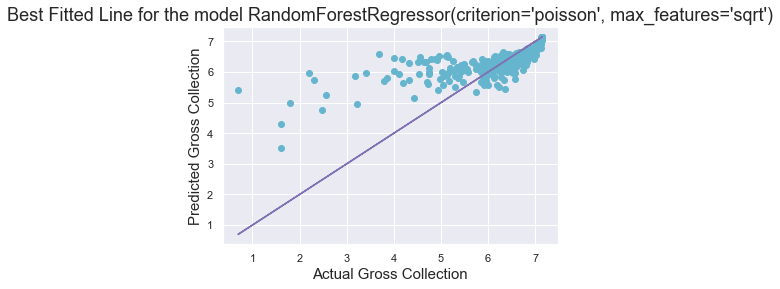

In [70]:
model(rf,x,y)

Training Accuracy of model AdaBoostRegressor() is 0.9937405336565298
Testing Accuracy of model AdaBoostRegressor() is 0.9919720520162078

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 0.07342804282251066
The Mean Squared Error is (MSE) 0.009258579125304709
The Root Mean Squared Error is (RMSE) 0.09622151072034106


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model AdaBoostRegressor() is 99.00234873459783 & std is 0.001552213396370572


At K-Fold 3 the CV Score of model AdaBoostRegressor() is 99.28932146691594 & std is 0.0006265808074714675


At K-Fold 4 the CV Score of model AdaBoostRegressor() is 99.22153625143625 & std is 0.0030161689340515775



	


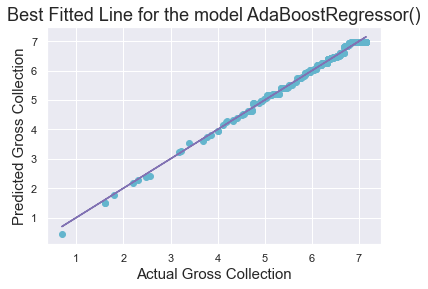

In [71]:
model(ad,x,y)

Training Accuracy of model GradientBoostingRegressor(max_features='sqrt') is 0.9937571953006014
Testing Accuracy of model GradientBoostingRegressor(max_features='sqrt') is 0.9782824686690073

Error in the model is calculated below-

The Mean Absolute Error is (MAE) 0.10216407675686981
The Mean Squared Error is (MSE) 0.023725416313743627
The Root Mean Squared Error is (RMSE) 0.15403056941316431


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model GradientBoostingRegressor(max_features='sqrt') is 91.87180643701798 & std is 0.04693367197803999


At K-Fold 3 the CV Score of model GradientBoostingRegressor(max_features='sqrt') is 97.76920468243789 & std is 0.002959926828374211


At K-Fold 4 the CV Score of model GradientBoostingRegressor(max_features='sqrt') is 97.26411413493791 & std is 0.009660962035154734



	


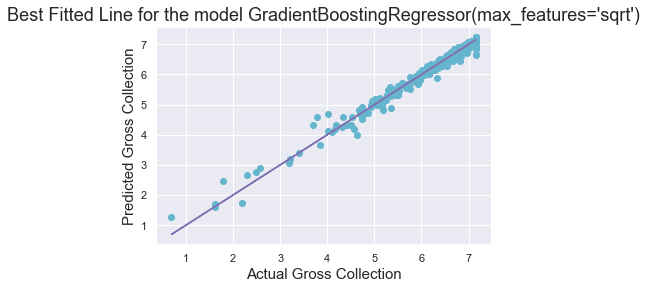

In [72]:
model(grd,x,y)

# Saving the Best Model

In [73]:
import joblib
file='gross collection_regrsn.obj'
joblib.dump(rf,file)

['gross collection_regrsn.obj']

# Loading the Model

In [74]:
a=joblib.load('gross collection_regrsn.obj')
a

RandomForestRegressor(criterion='poisson', max_features='sqrt')

In [75]:
#making prediction
pred=a.predict(x_test)
pred

array([6.85764656, 6.52230246, 6.70114973, 6.85533959, 6.38252345,
       6.34937668, 7.15305163, 6.60135608, 5.40006134, 6.51203673,
       5.23704012, 6.0114204 , 5.99640353, 6.49559719, 6.32533823,
       7.03420074, 7.15305163, 6.33885226, 7.13429713, 6.43456343,
       5.8191415 , 6.14015075, 7.04381616, 6.41193239, 6.64919863,
       5.62814203, 5.942665  , 6.31689102, 6.09506352, 6.5332657 ,
       6.17623957, 6.77222519, 6.28733994, 6.2935917 , 6.95538983,
       6.22578293, 6.43467793, 6.46195876, 6.36168987, 6.24389282,
       6.1328361 , 6.21892451, 6.44018467, 6.8388961 , 5.84592955,
       6.79189311, 6.89834489, 6.08260702, 7.10694884, 6.33269484,
       6.51062306, 6.11917801, 6.17781987, 7.1468656 , 6.51156505,
       6.81620235, 6.04845653, 7.15039664, 6.65491575, 5.84583006,
       6.48594223, 6.27278413, 6.66100214, 6.37565925, 6.00228612,
       7.13732503, 6.37300713, 6.14761305, 6.96221926, 6.96364921,
       6.71402915, 6.37063916, 7.15305163, 6.66727194, 6.16477

In [76]:
#Accuracy of RandomForestRegressor
accuracy_score=r2_score(pred,y_test)
accuracy_score

-1.5328928705817102

<AxesSubplot:ylabel='Density'>

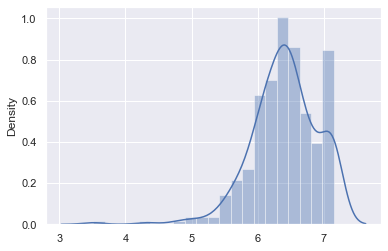

In [77]:
#plotting distribution plot to check normal distribution
sns.distplot(pred)

Text(0.5, 1.0, 'Best Fitted Line of the Model')

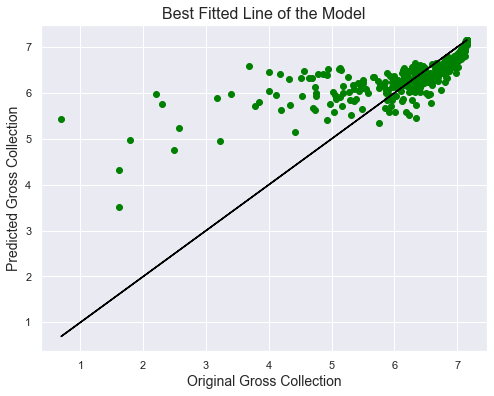

In [78]:
#Plotting Best-Fitted Line
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred,color='GREEN')
plt.plot(y_test,y_test,color='black')
plt.xlabel('Original Gross Collection',fontsize=14)
plt.ylabel('Predicted Gross Collection',fontsize=14)
plt.title('Best Fitted Line of the Model',fontsize=16)

In [79]:
conclusion=pd.DataFrame(data=([pred,y_test]),index=['Predicted Gross Collection','Original Gross Collection'])
conclusion

0         1        2         3         4    \
Predicted Gross Collection  6.857647  6.522302  6.70115  6.855340  6.382523   
Original Gross Collection   7.012115  6.642487  6.97073  6.988413  6.599870   

                                 5         6         7         8         9    \
Predicted Gross Collection  6.349377  7.153052  6.601356  5.400061  6.512037   
Original Gross Collection   6.184149  7.153052  6.403574  4.927254  4.948760   

                            ...       311       312       313       314  \
Predicted Gross Collection  ...  6.002541  6.048179  6.349143  5.951443   
Original Gross Collection   ...  6.505784  6.109248  5.676754  4.110874   

                                 315       316       317       318       319  \
Predicted Gross Collection  5.957308  6.486069  6.938304  6.758201  6.230264   
Original Gross Collection   5.918894  6.755769  7.080026  6.991177  5.963579   

                                 320  
Predicted Gross Collection  6.068986  
Original Gross Collection   6.739337  

[2 rows x 321 columns]